In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl

In [3]:
df = pd.read_csv('./Latency_model/Latency_0921_reduced.csv')
df.head()

tol  OriSize  total_latency  load_time  transfer_time  comp_time  \
0  0.00001      100       1.095157       0.05       0.477934   0.330358   
1  0.00001      200       2.049806       0.10       0.955869   0.596031   
2  0.00001      300       2.985212       0.15       1.433803   0.852497   
3  0.00001      400       3.936194       0.20       1.911737   1.119822   
4  0.00001      500       4.868190       0.25       2.389672   1.379341   

   decomp_time  
0     0.236864  
1     0.397906  
2     0.548912  
3     0.704634  
4     0.849178

In [4]:
NetBw = 125 # MB ?
nvmeBw = 2000000
def NoCompLatency(OriSize):
    return OriSize/nvmeBw + OriSize/NetBw

In [5]:
LZ4GPUDecompBW = 312000.81

def TiledbLz4Latency(OriSize):
    return  OriSize/1.05/NetBw + OriSize/1.05/LZ4GPUDecompBW


def TiledbLz4L1Hit(OriSize):
    return OriSize/1.05/LZ4GPUDecompBW

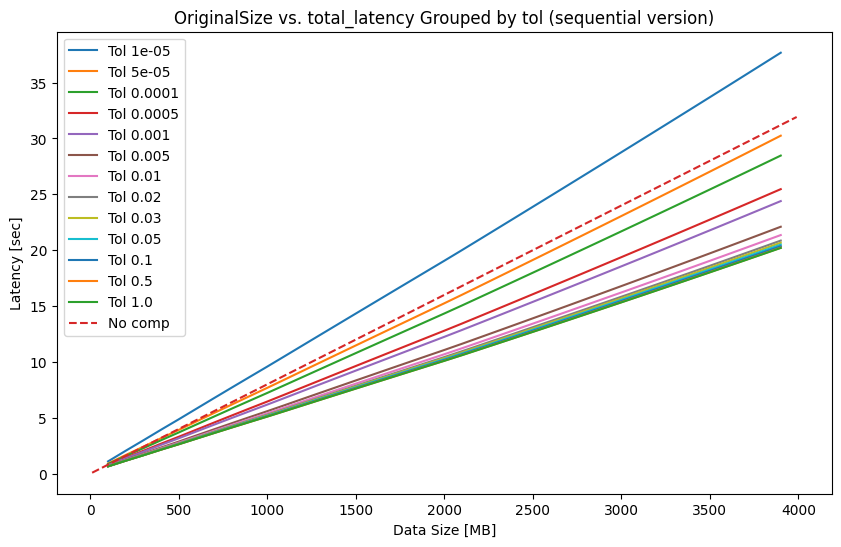

In [6]:
grouped_data = df.groupby('tol')

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriSize'], group['total_latency'], label=f'Tol {tol}')

ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')
# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency Grouped by tol (sequential version)')
ax.legend()

# Show the plot
plt.show()

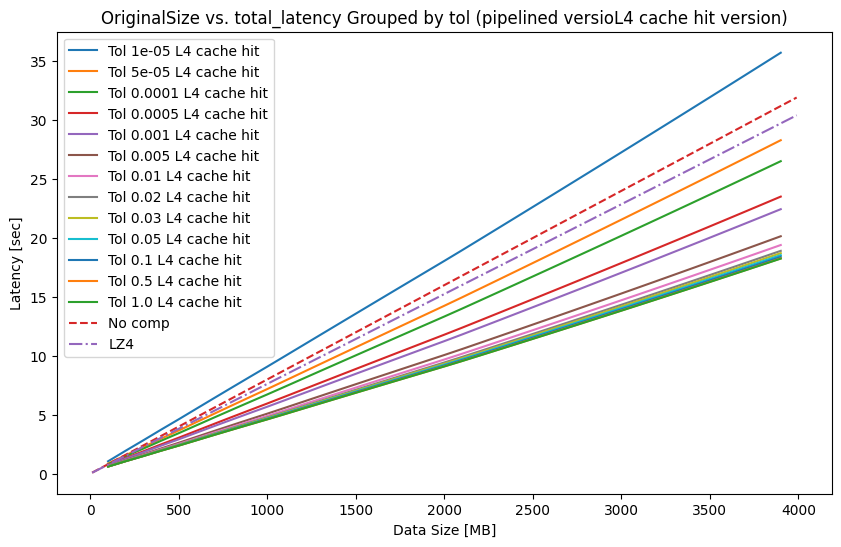

In [7]:
grouped_data = df.groupby('tol')

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)
LZ4_l = TiledbLz4Latency(x_range)
LZ4_l1 = TiledbLz4L1Hit(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriSize'], group['total_latency'] - group['load_time'], label=f'Tol {tol} L4 cache hit')

ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')
ax.plot(x_range,LZ4_l,label="LZ4",linestyle='-.')
# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency Grouped by tol (pipelined versioL4 cache hit version)')
ax.legend()

# Show the plot
plt.show()

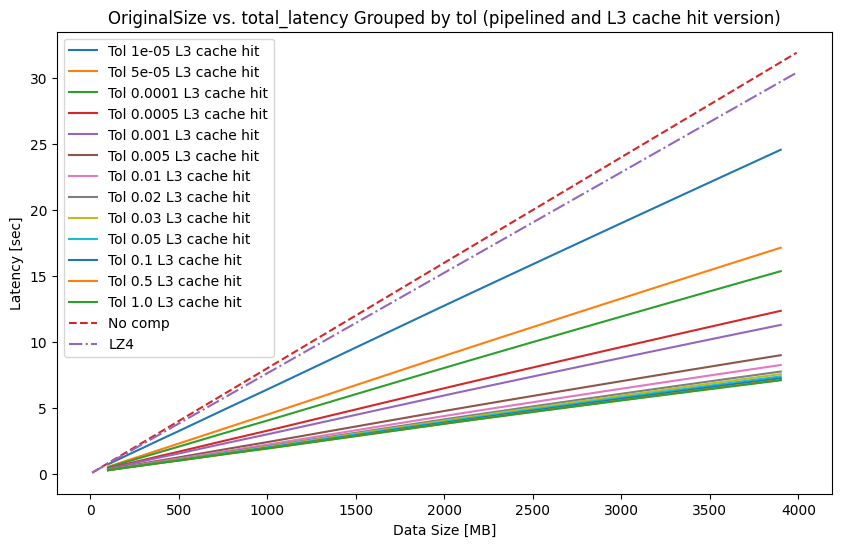

In [8]:
grouped_data = df.groupby('tol')

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriSize'], group['total_latency'] - group['load_time'] - group["comp_time"], label=f'Tol {tol} L3 cache hit')

ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')
ax.plot(x_range,LZ4_l,label="LZ4",linestyle='-.')
# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency Grouped by tol (pipelined and L3 cache hit version)')
ax.legend()

# Show the plot
plt.show()


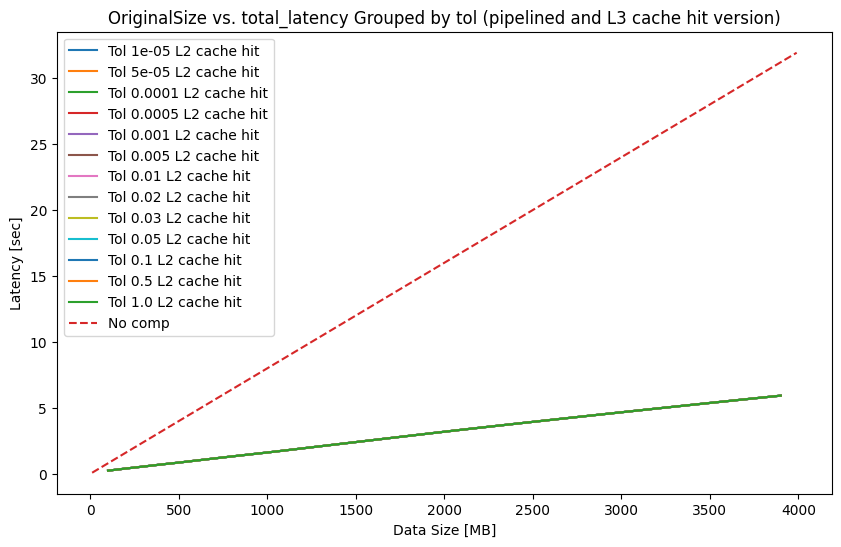

In [9]:
grouped_data = df.groupby('tol')

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriSize'], group['total_latency'] - group['load_time'] - group["comp_time"] - group["transfer_time"], label=f'Tol {tol} L2 cache hit')

ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')
# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency Grouped by tol (pipelined and L3 cache hit version)')
ax.legend()

# Show the plot
plt.show()


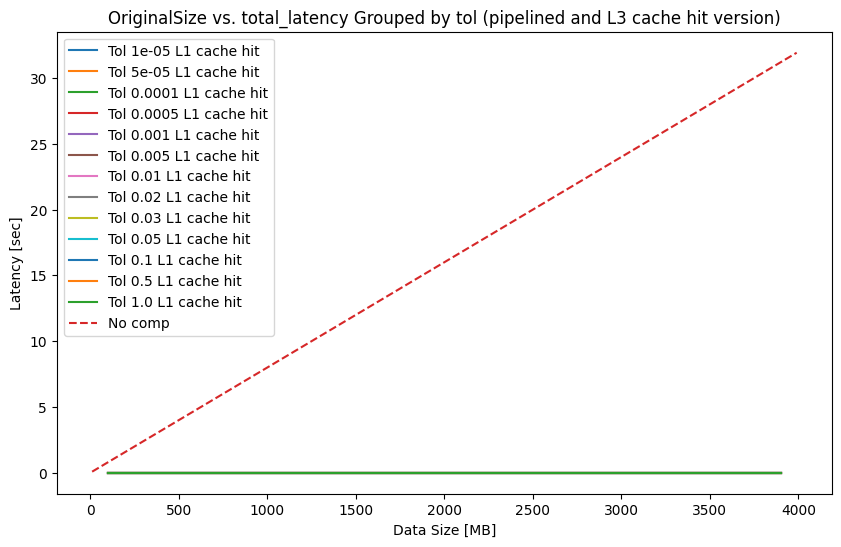

In [10]:
grouped_data = df.groupby('tol')

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriSize'], group['total_latency'] - group['load_time'] - group["comp_time"] - group["transfer_time"] - group["decomp_time"], label=f'Tol {tol} L1 cache hit')

ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')
# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency Grouped by tol (pipelined and L3 cache hit version)')
ax.legend()

# Show the plot
plt.show()


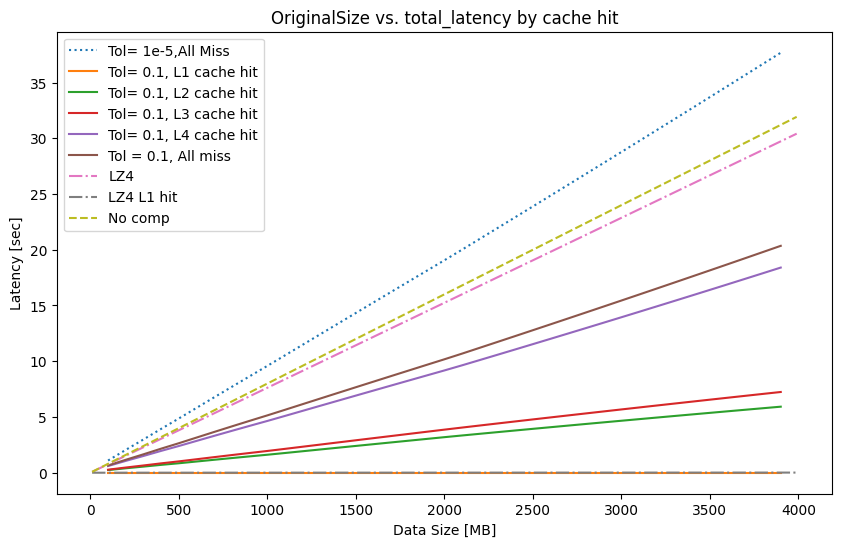

In [20]:
group = df[df["tol"] == 0.1]
min_tol = df[df["tol"] == 0.00001]

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(min_tol["OriSize"],min_tol['total_latency'],label=f'Tol= 1e-5,All Miss',linestyle=':')
ax.plot(group["OriSize"], group['total_latency'] - group['load_time'] - group["comp_time"] - group["transfer_time"] - group["decomp_time"], label=f'Tol= 0.1, L1 cache hit')
ax.plot(group["OriSize"], group['total_latency'] - group['load_time'] - group["comp_time"] - group["transfer_time"], label=f'Tol= 0.1, L2 cache hit')    
ax.plot(group["OriSize"], group['total_latency'] - group['load_time'] - group["comp_time"], label=f'Tol= 0.1, L3 cache hit')    
ax.plot(group["OriSize"], group['total_latency'] - group['load_time'], label=f'Tol= 0.1, L4 cache hit') 
ax.plot(group["OriSize"], group['total_latency'], label='Tol = 0.1, All miss') 
ax.plot(x_range,LZ4_l,label="LZ4",linestyle='-.')
ax.plot(x_range,LZ4_l1,label="LZ4 L1 hit",linestyle='-.')
ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')
# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency by cache hit')
ax.legend()

# Show the plot
# plt.show()
plt.savefig("./latency_by_cache_hit.png")


In [17]:
grouped = df.groupby(['OriSize','tol'])[['load_time', 'transfer_time', 'comp_time', 'decomp_time']].sum()
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Break down of latency for tol={}'.format)
plt.xlabel('tol and OriSize')
plt.ylabel('Time')
plt.legend(title='Time Components', loc='upper right')
plt.show()


SyntaxError: unterminated string literal (detected at line 3) (2866501078.py, line 3)

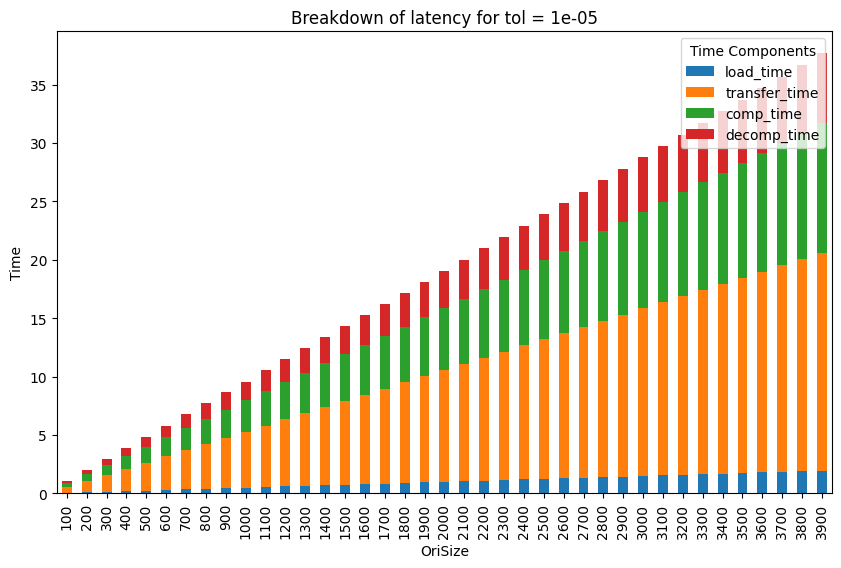

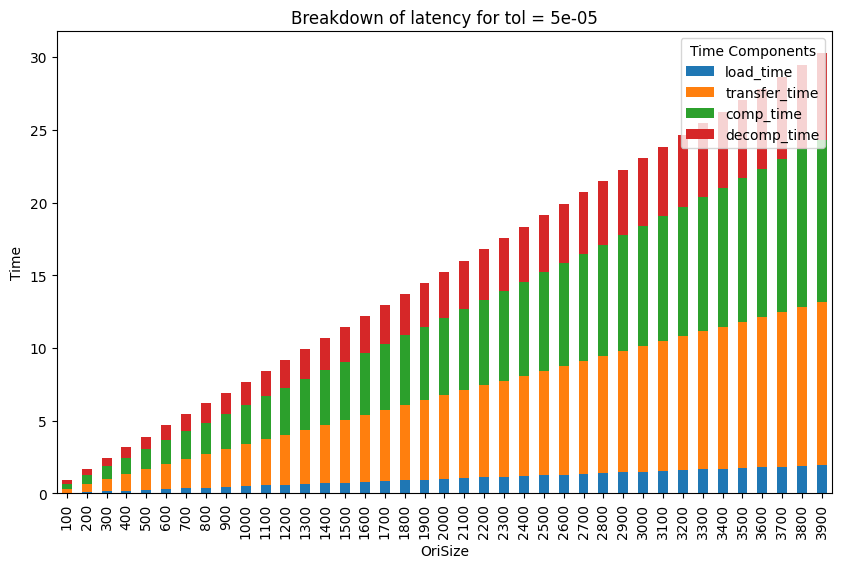

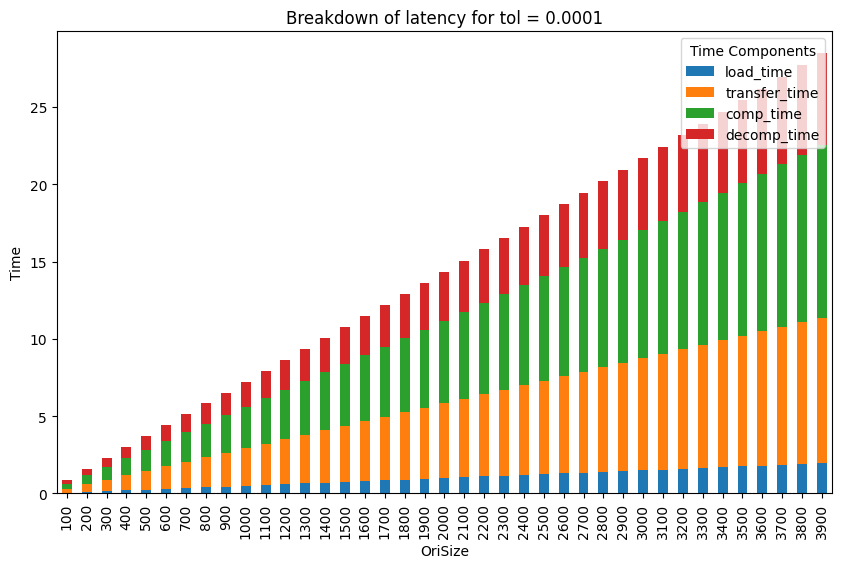

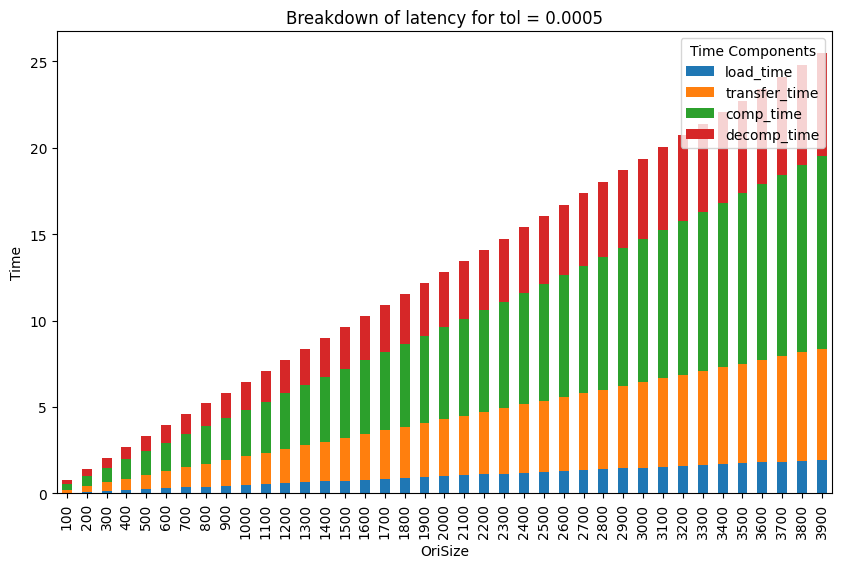

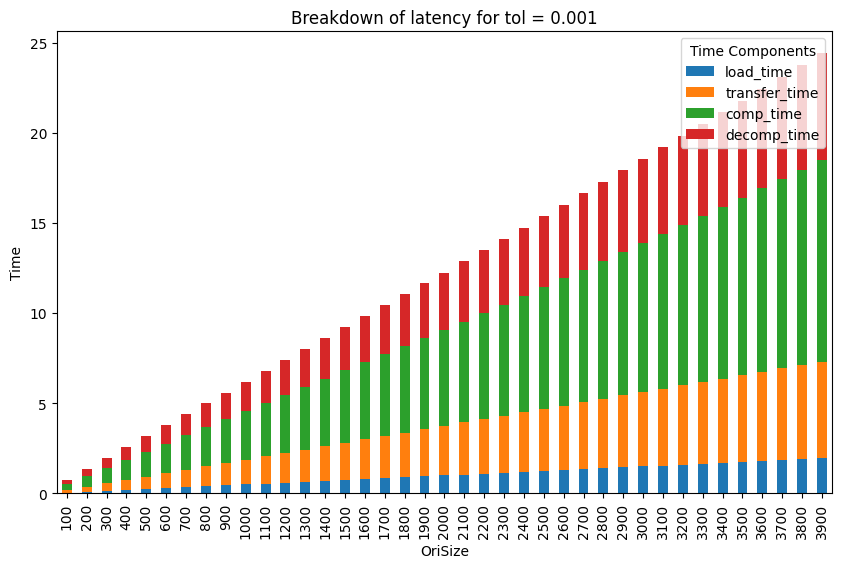

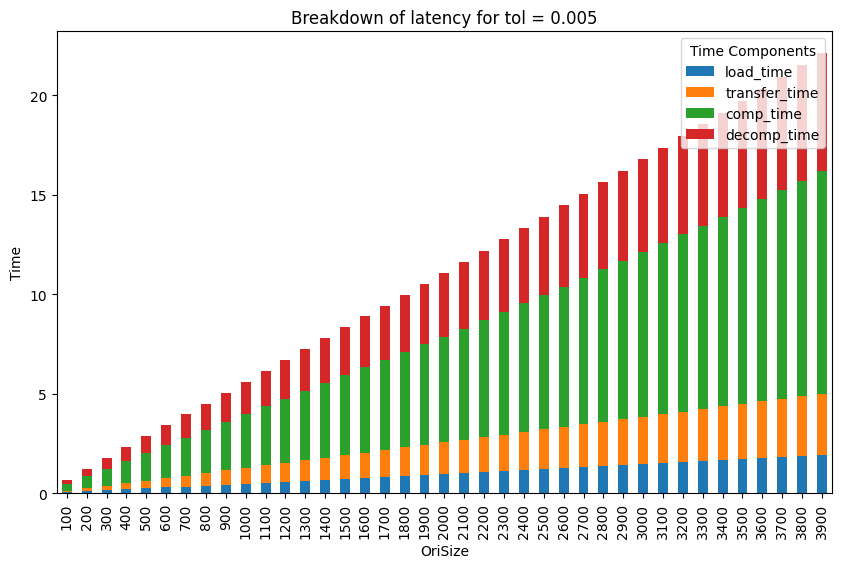

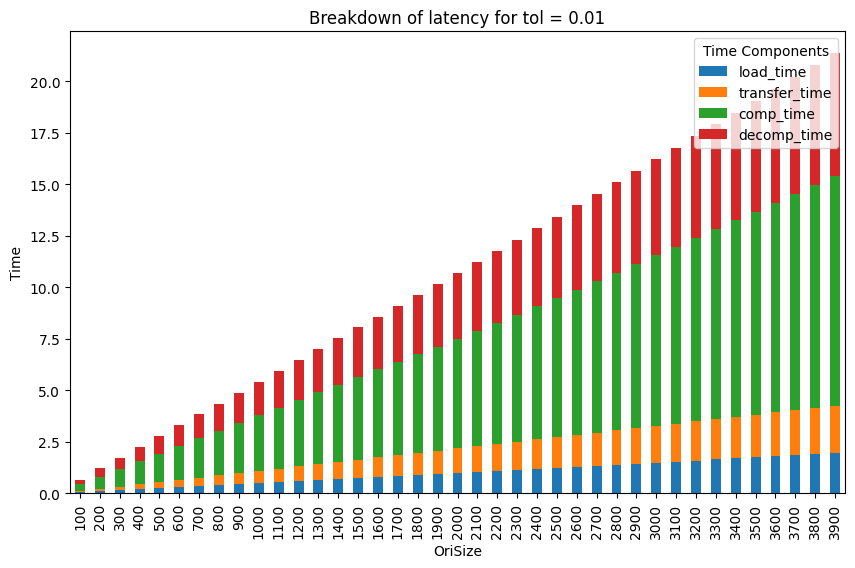

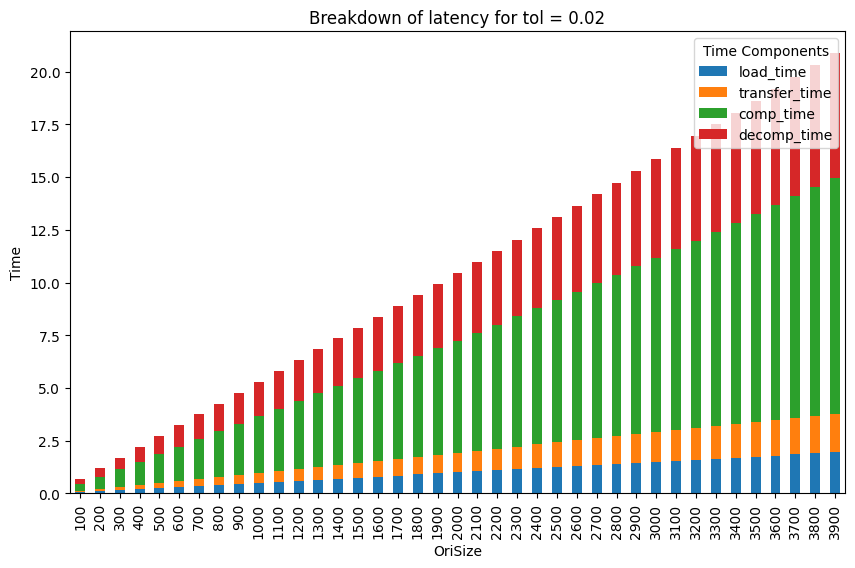

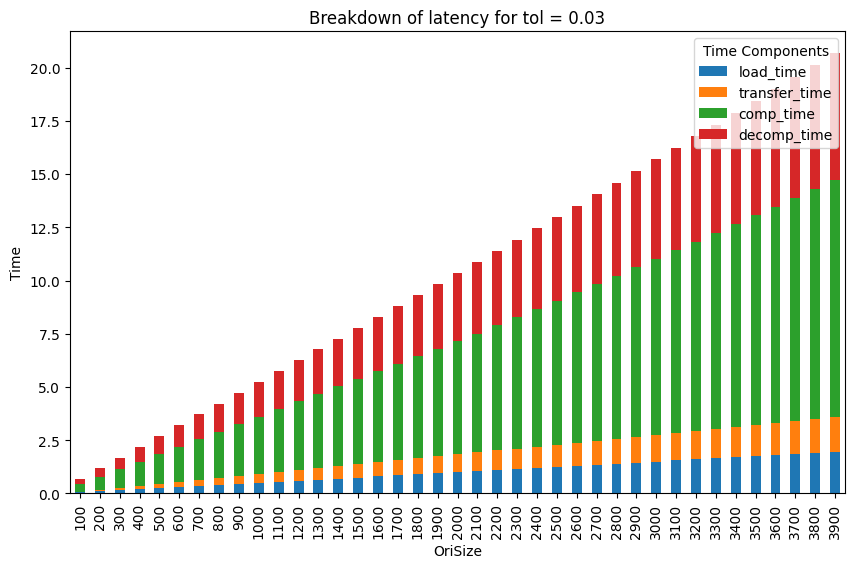

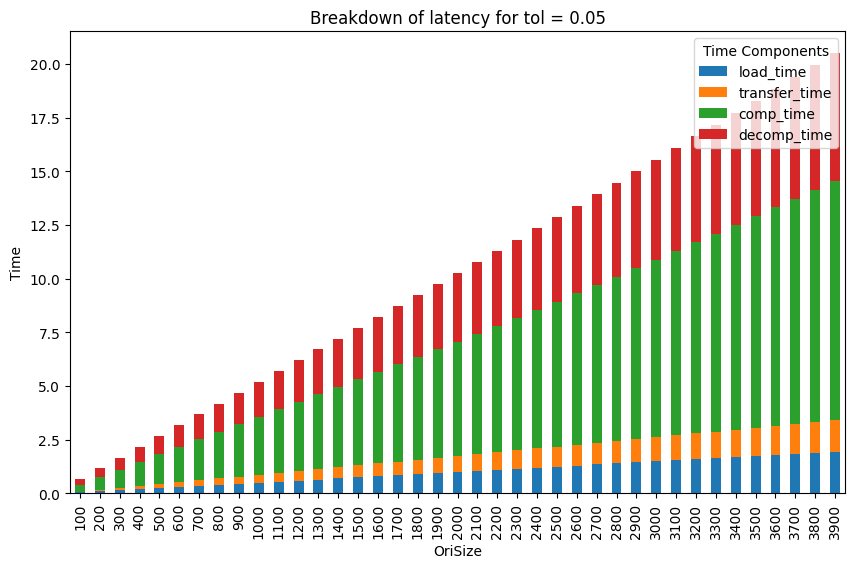

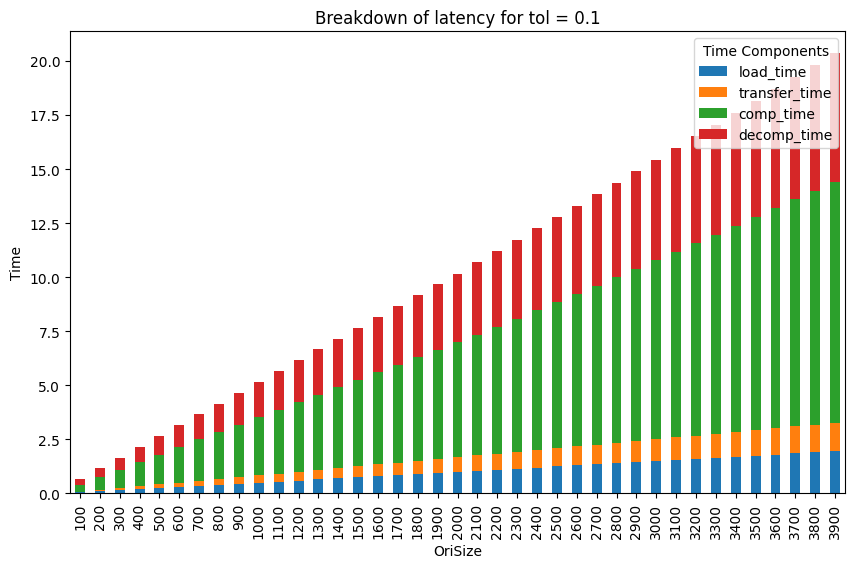

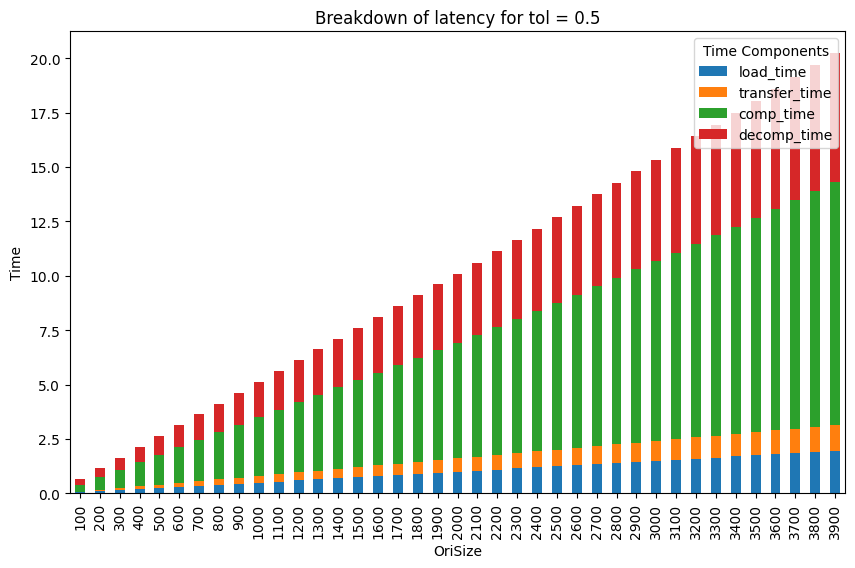

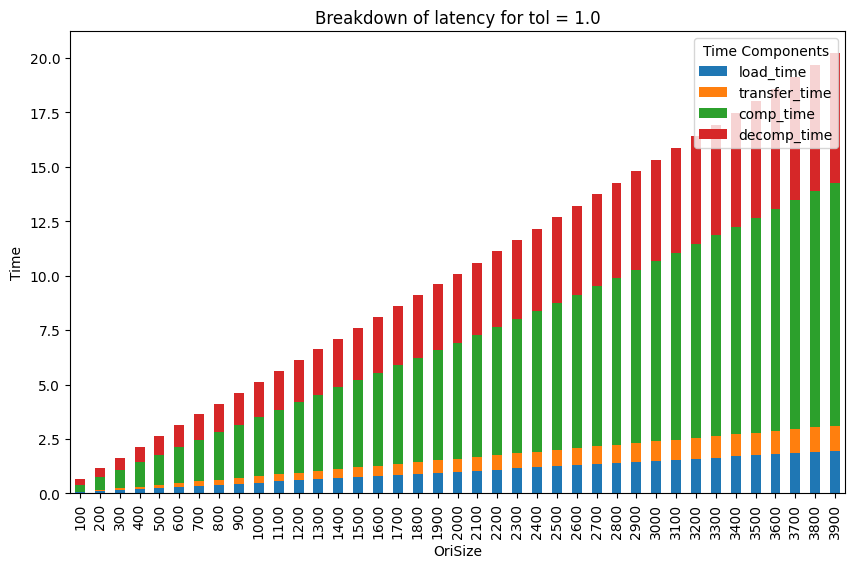

In [18]:
# Get unique values of 'tol'
unique_tols = df['tol'].unique()

# Create a separate stacked bar chart for each 'tol'
for tol in unique_tols:
    tol_df = df[df['tol'] == tol]
    grouped = tol_df.groupby('OriSize')[['load_time', 'transfer_time', 'comp_time', 'decomp_time']].sum()
    
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Breakdown of latency for tol = {tol}')
    plt.xlabel('OriSize')
    plt.ylabel('Time')
    plt.legend(title='Time Components', loc='upper right')
    plt.savefig("tol={}_detail.png".format(tol))

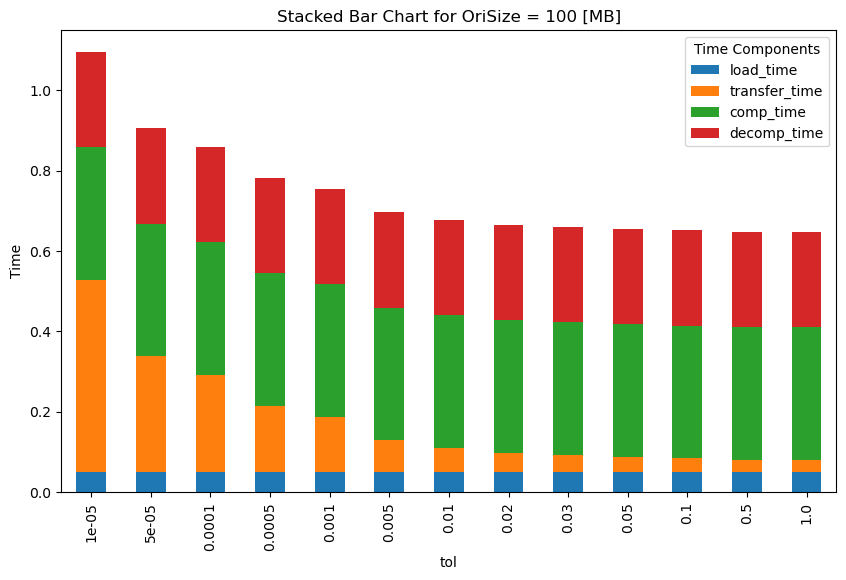

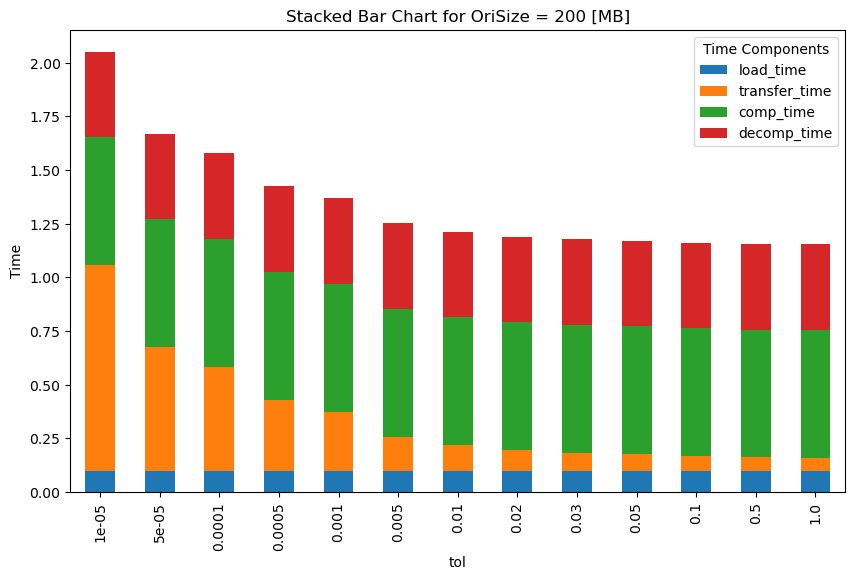

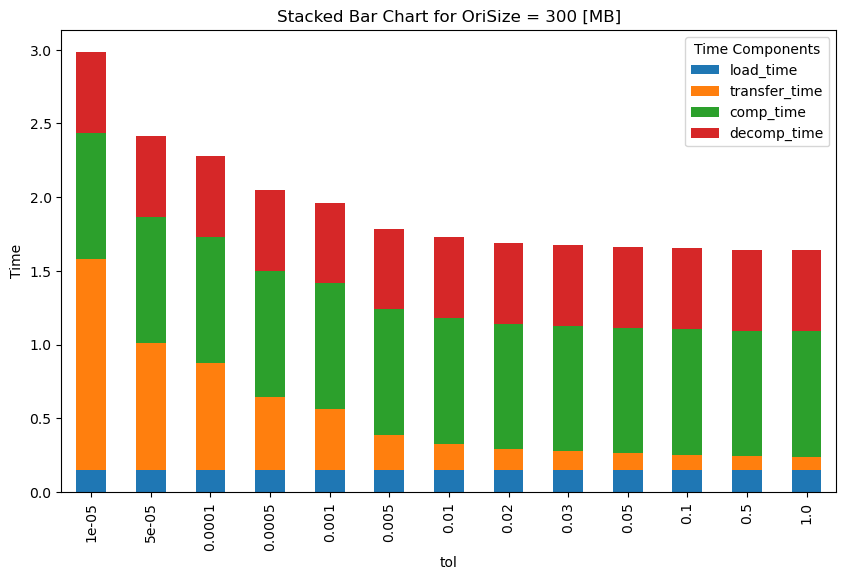

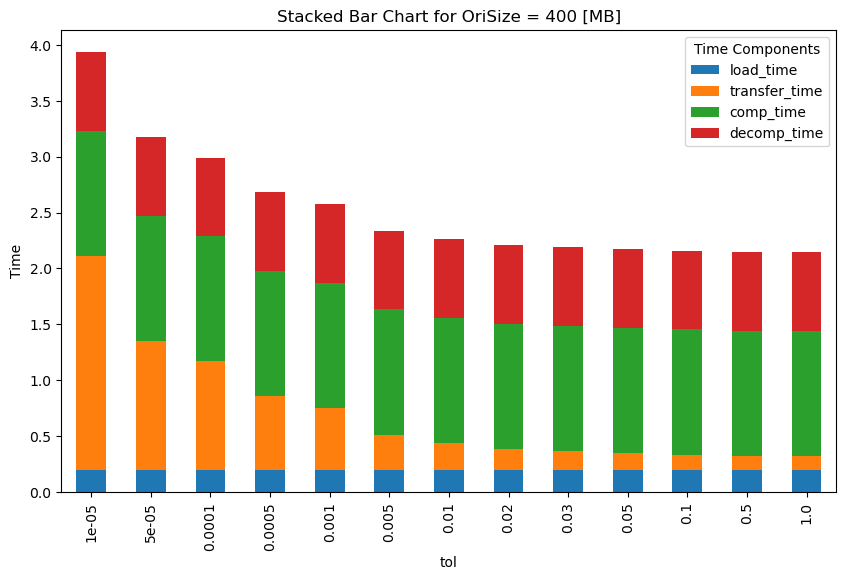

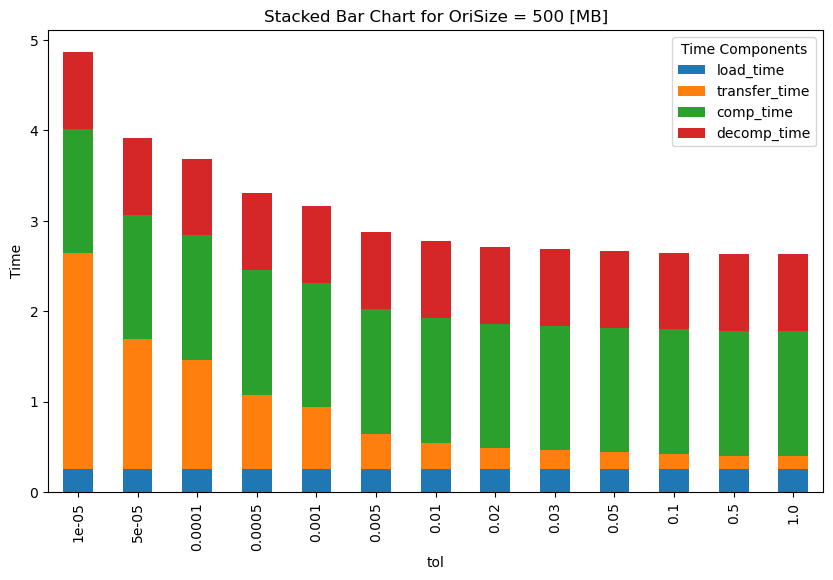

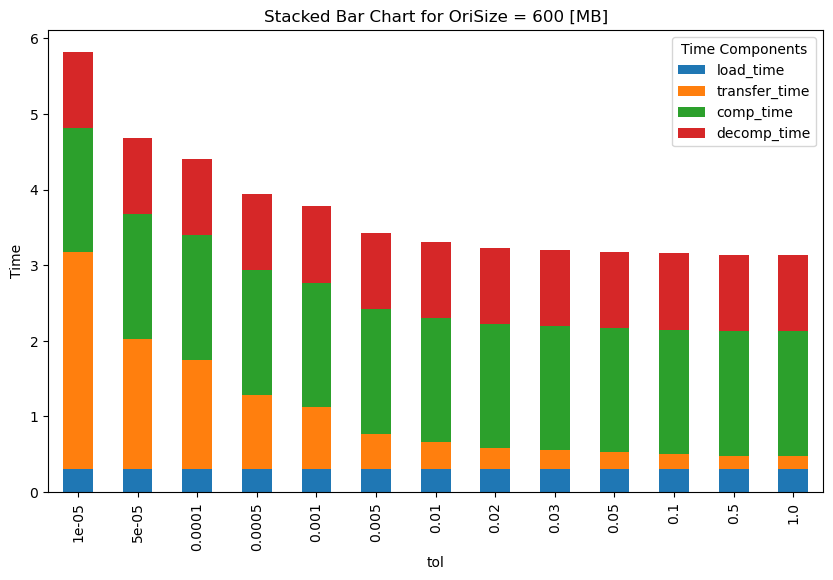

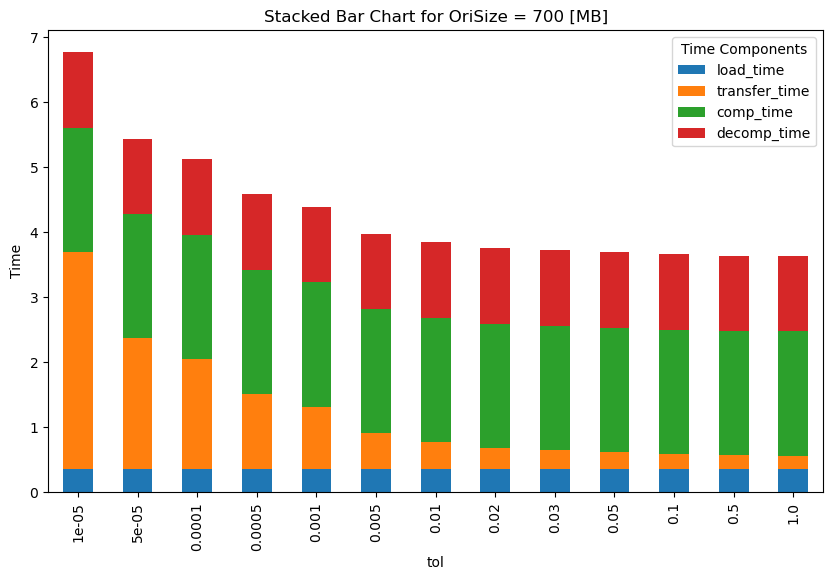

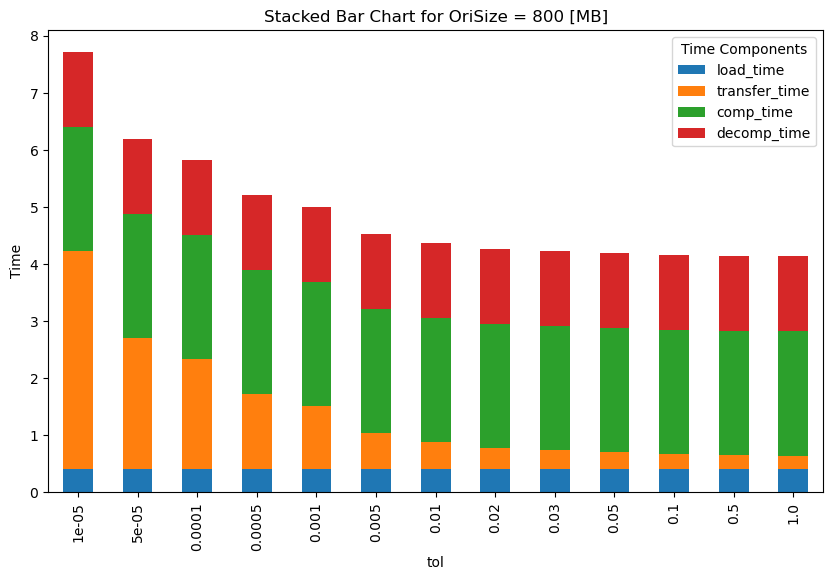

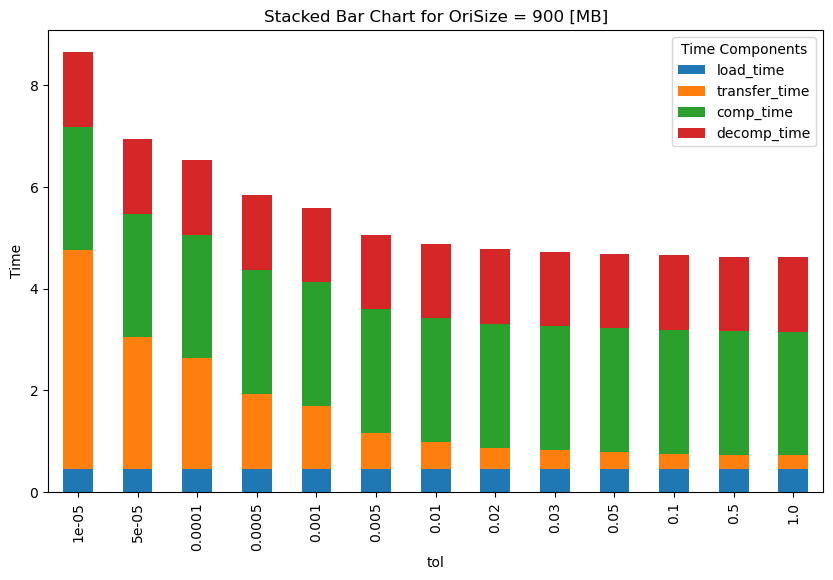

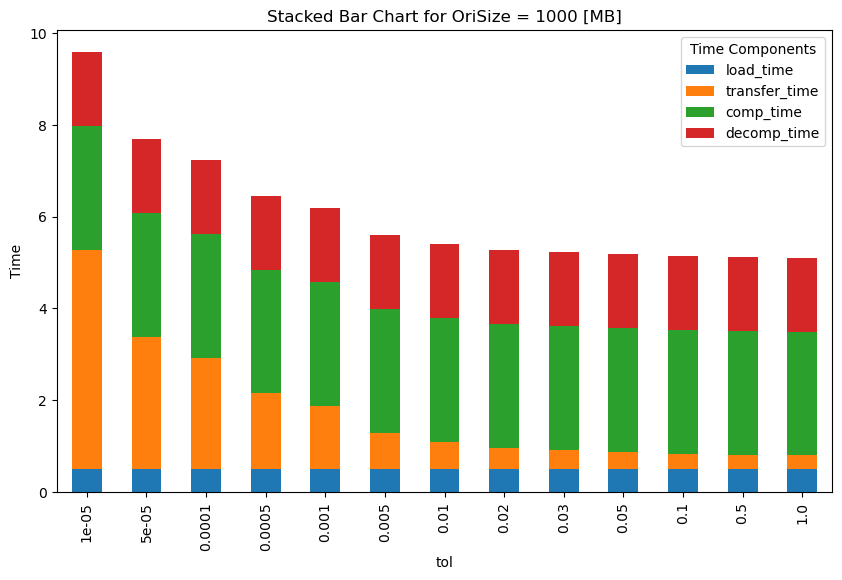

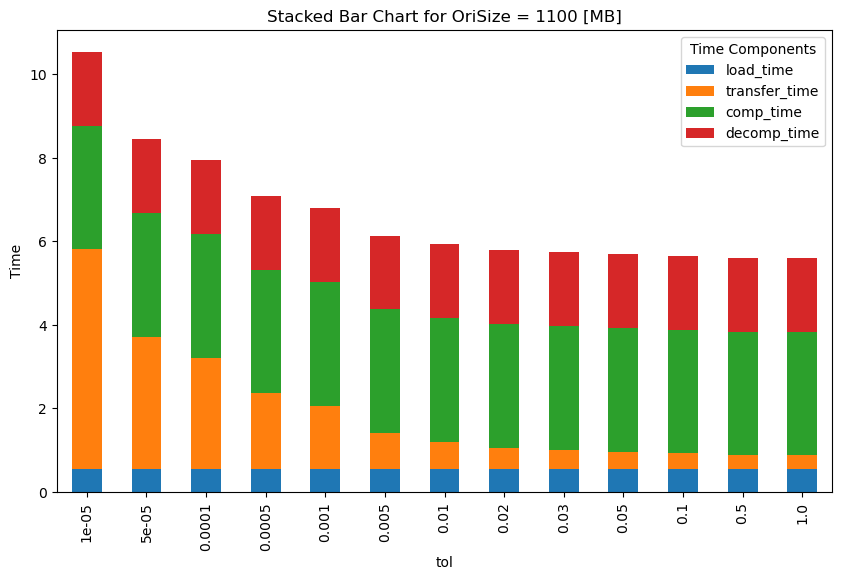

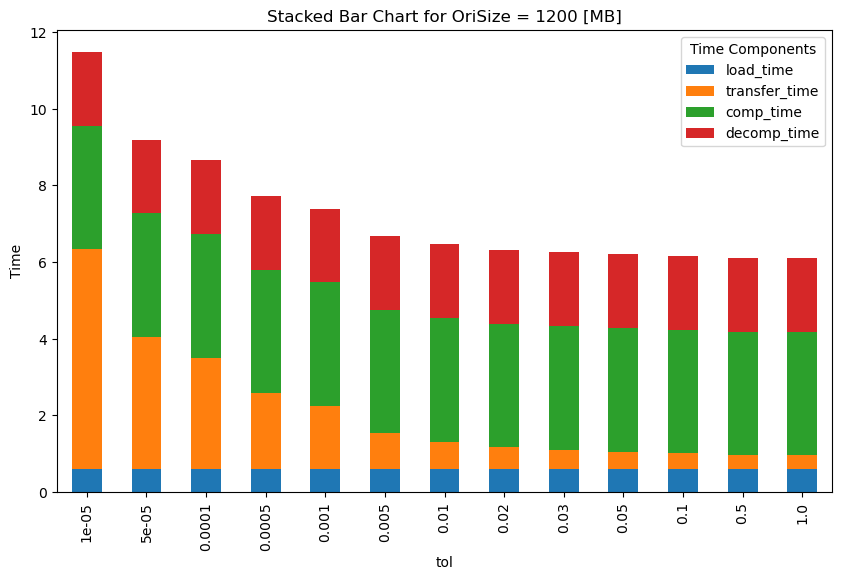

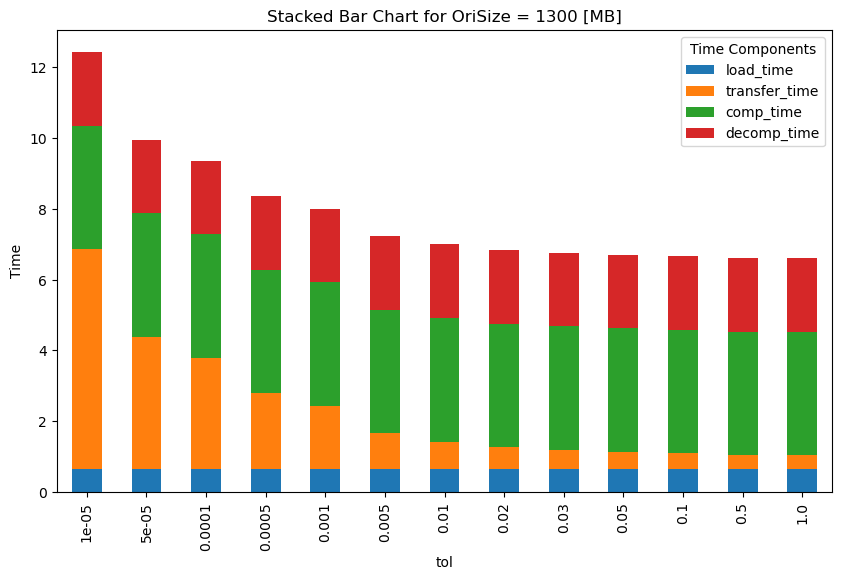

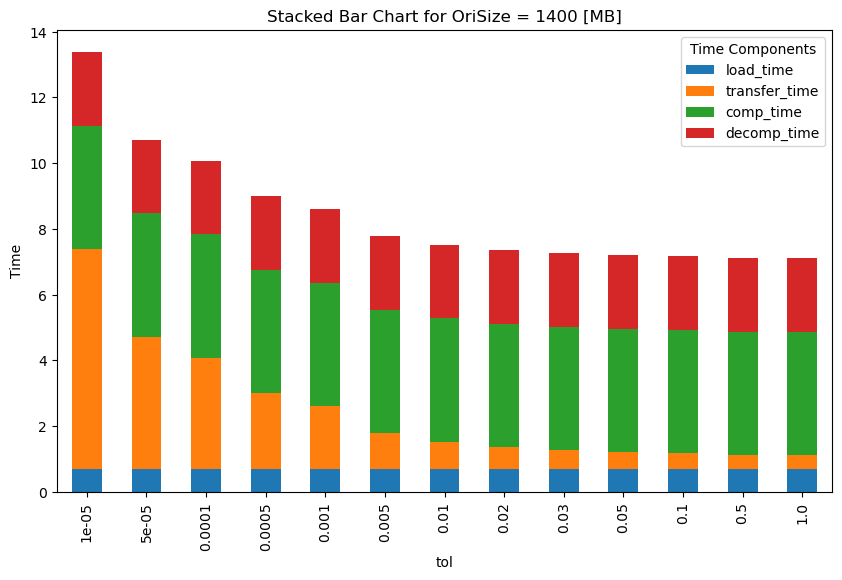

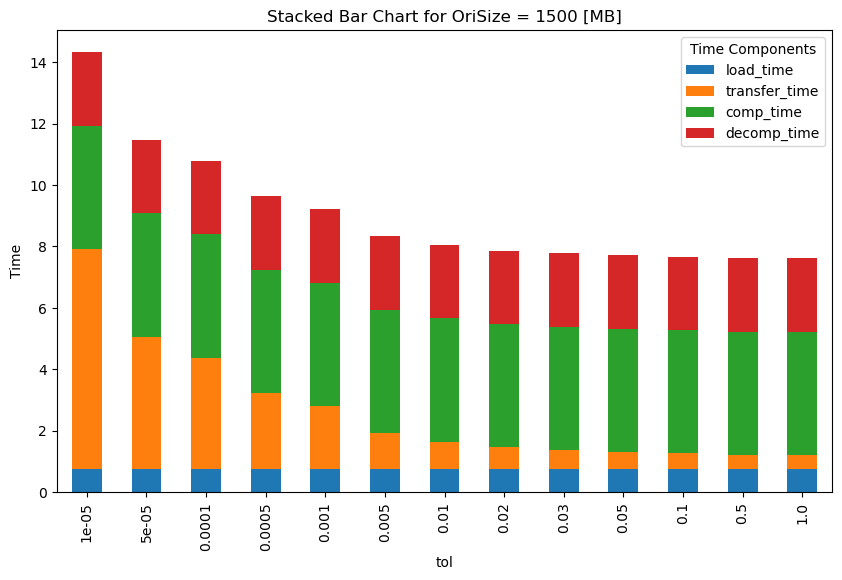

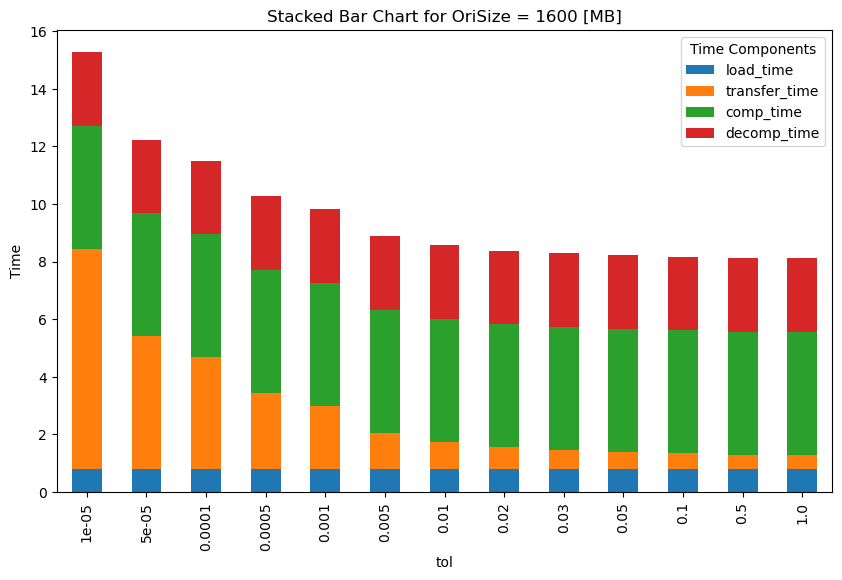

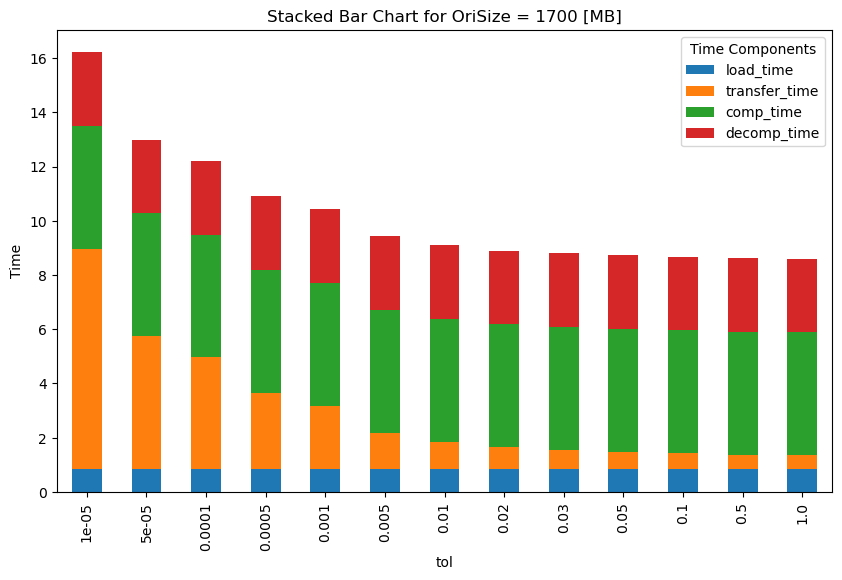

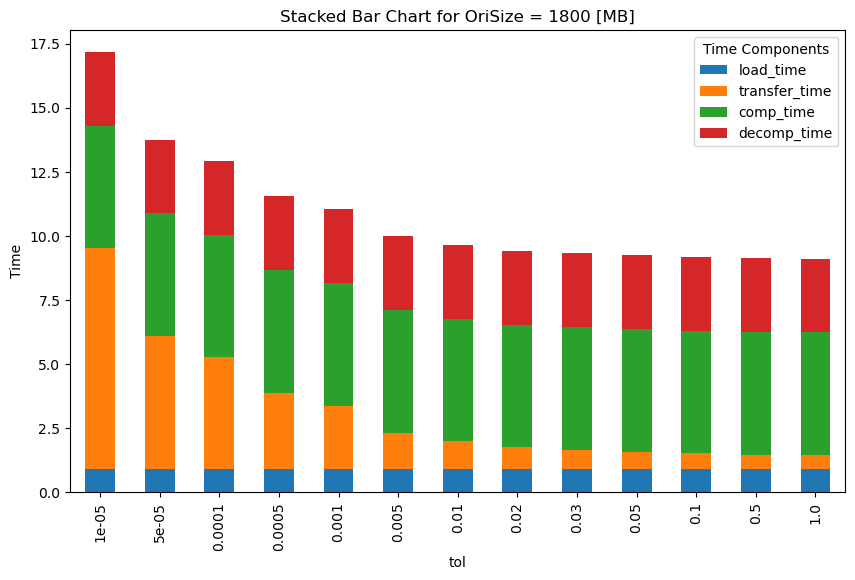

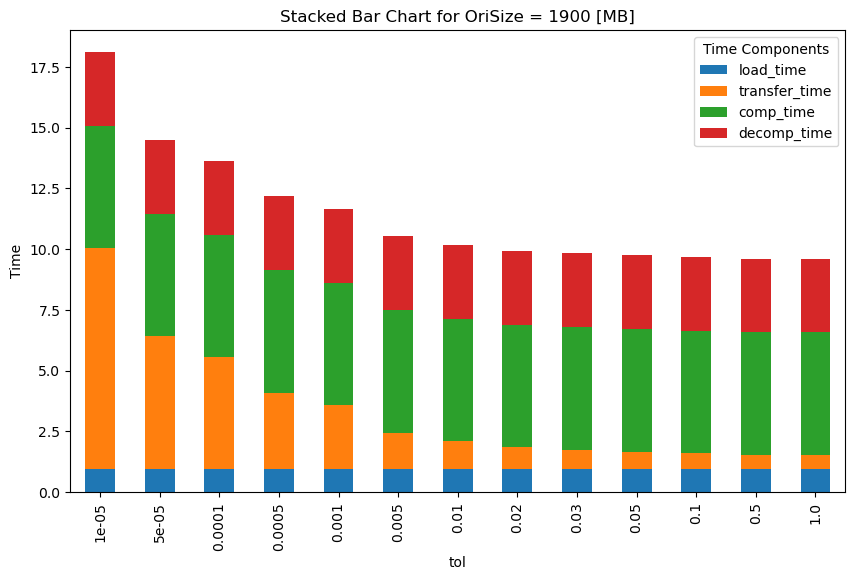

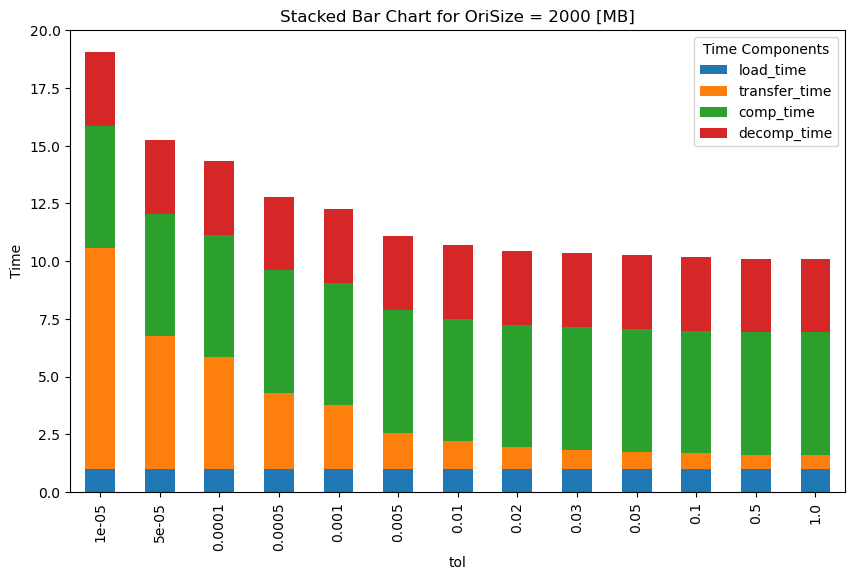

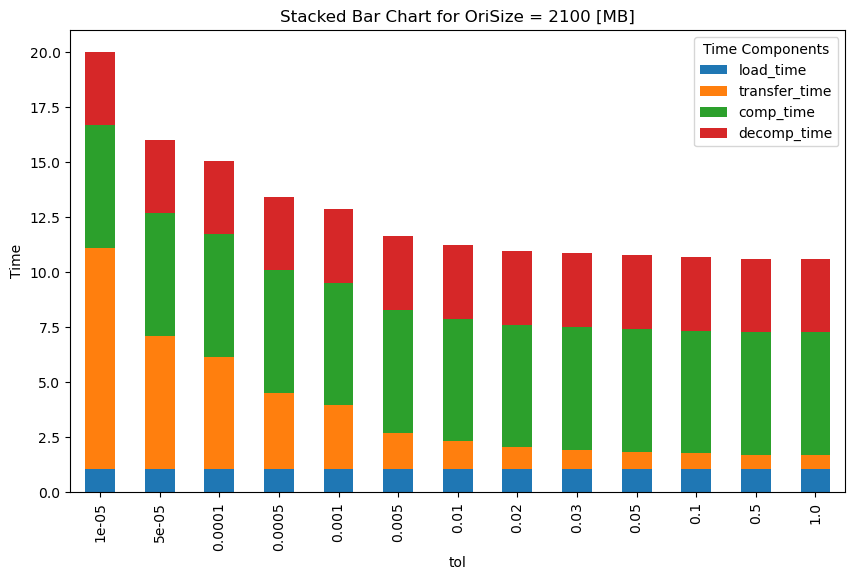

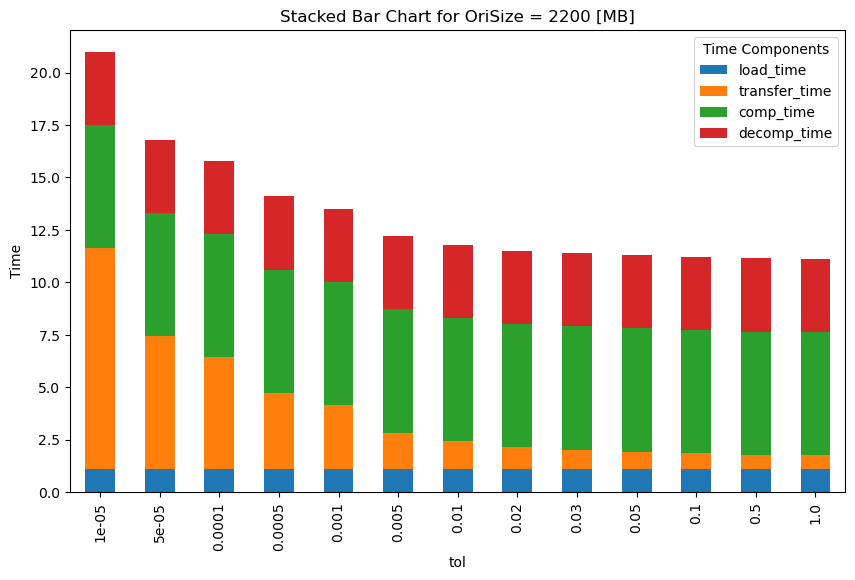

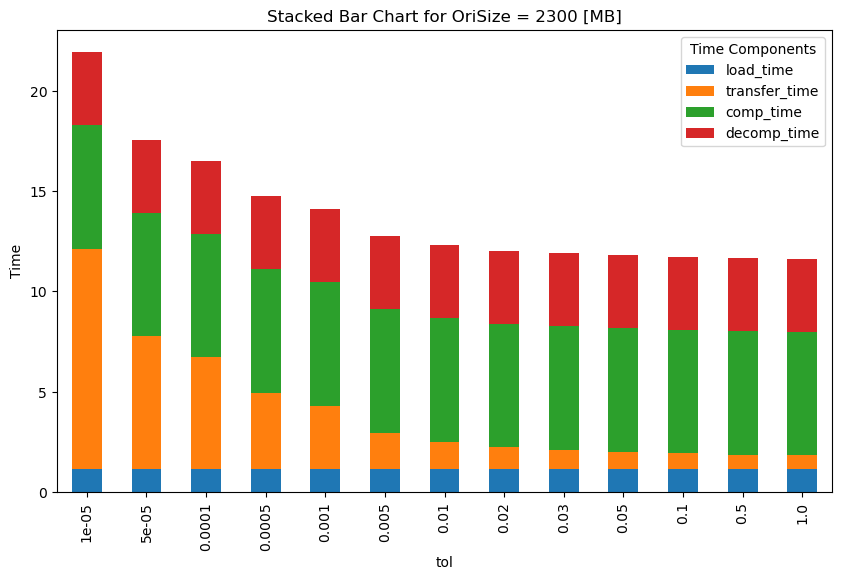

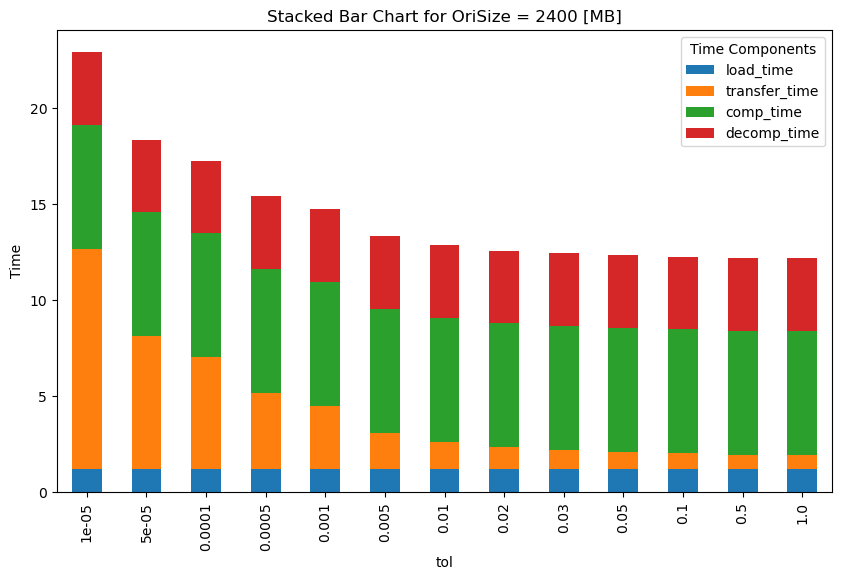

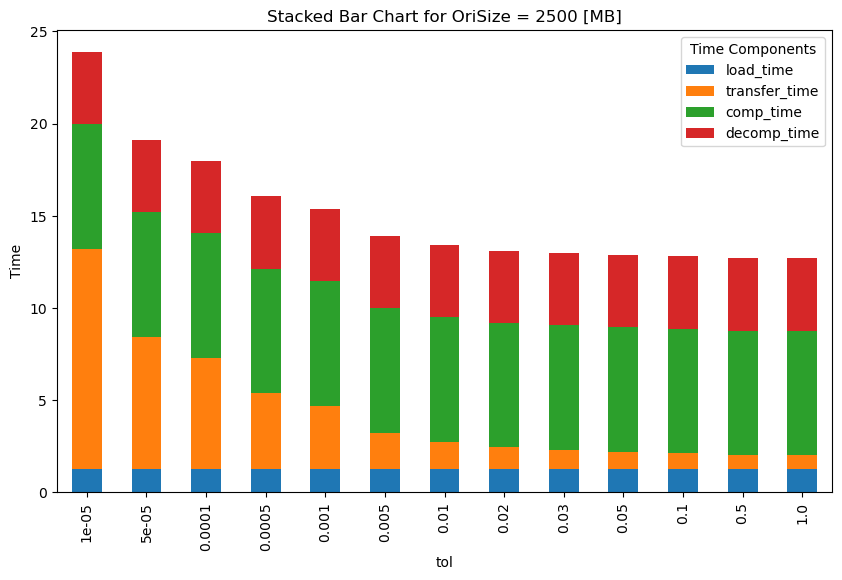

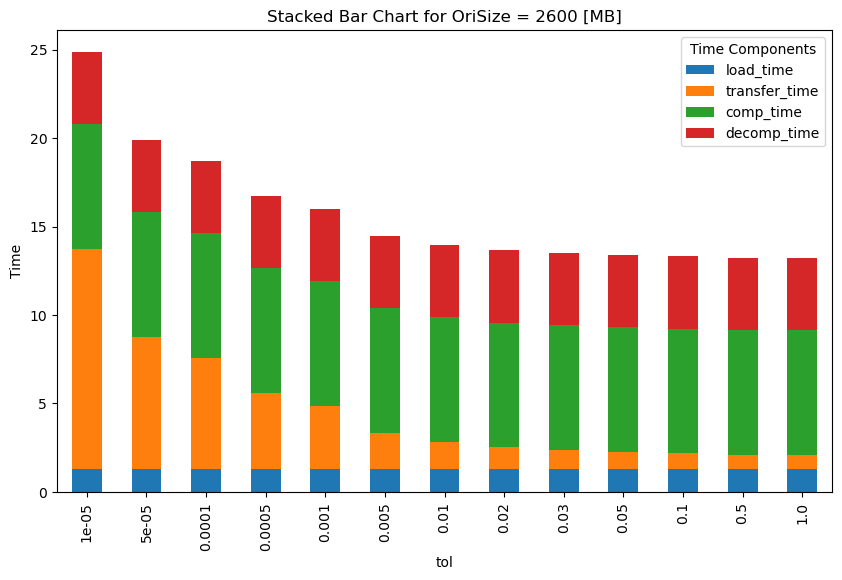

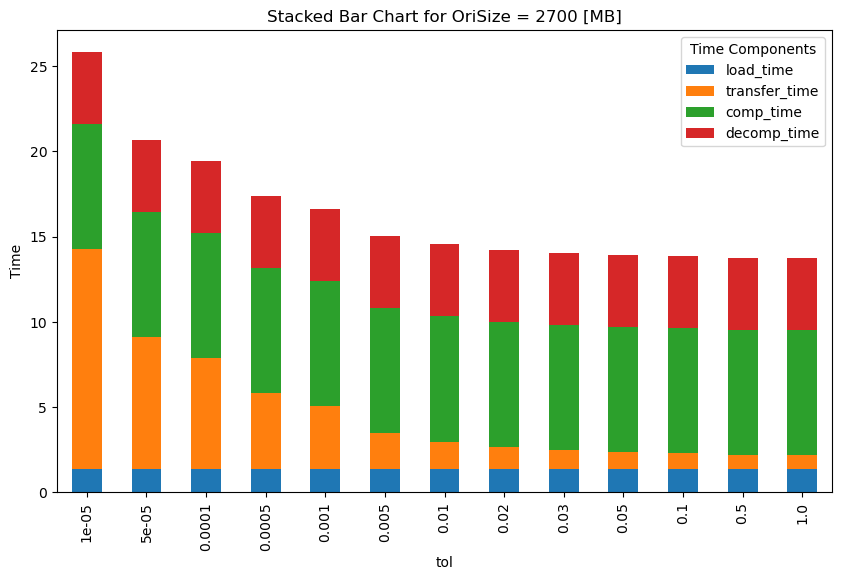

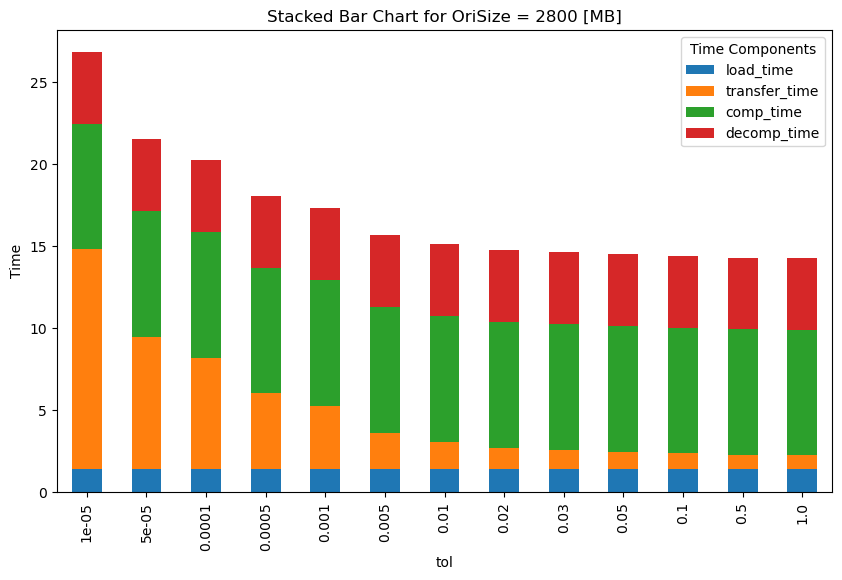

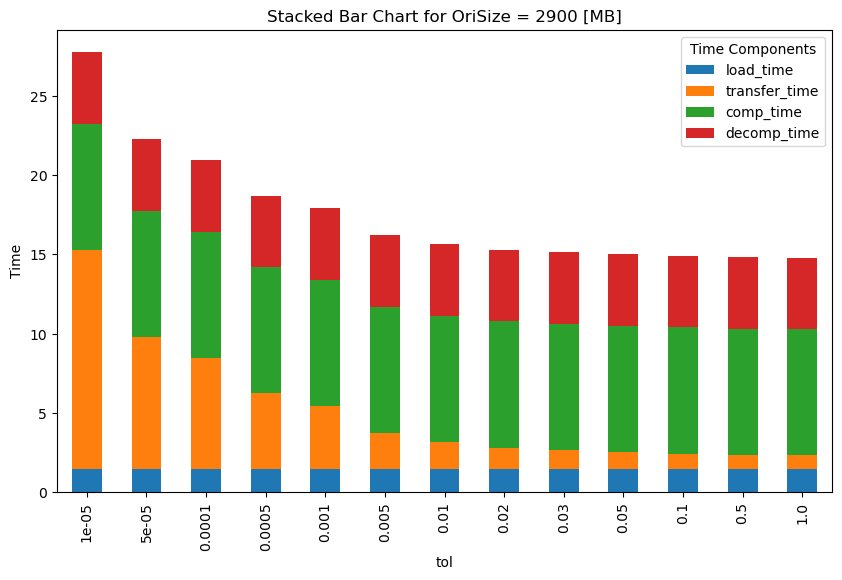

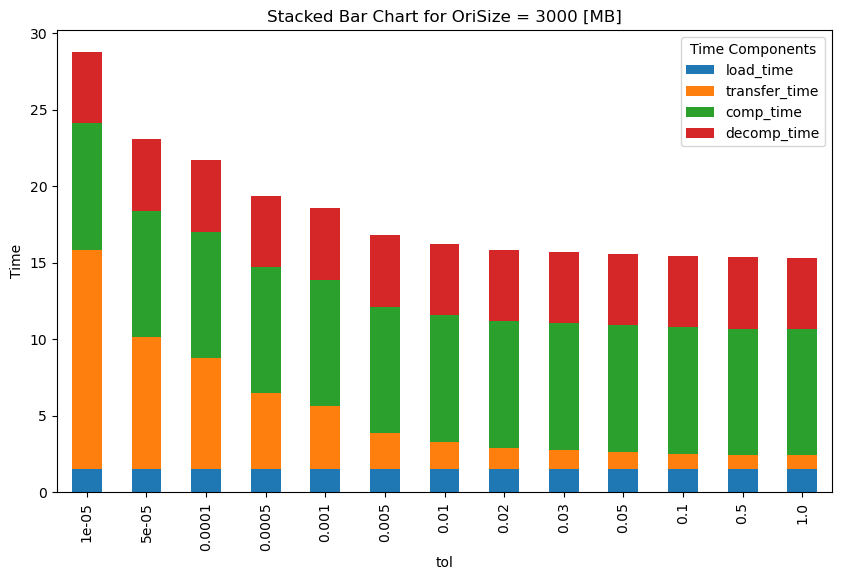

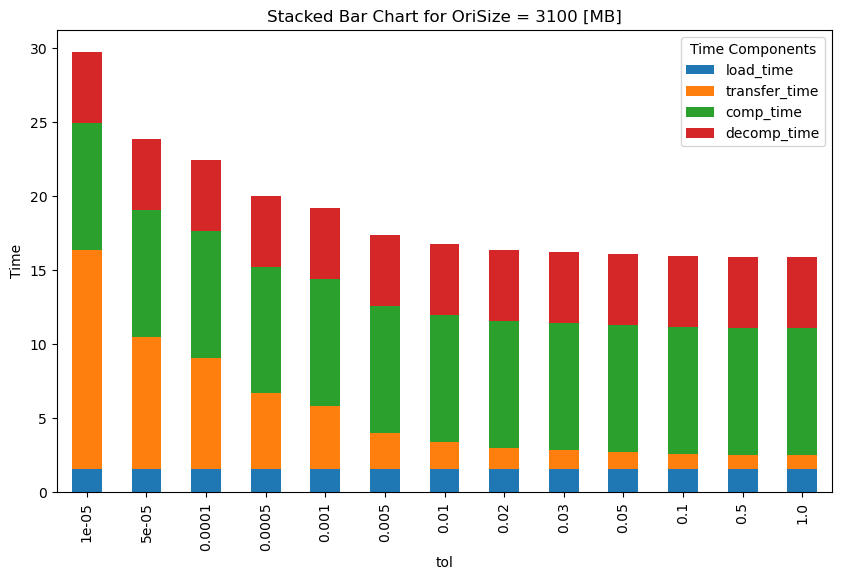

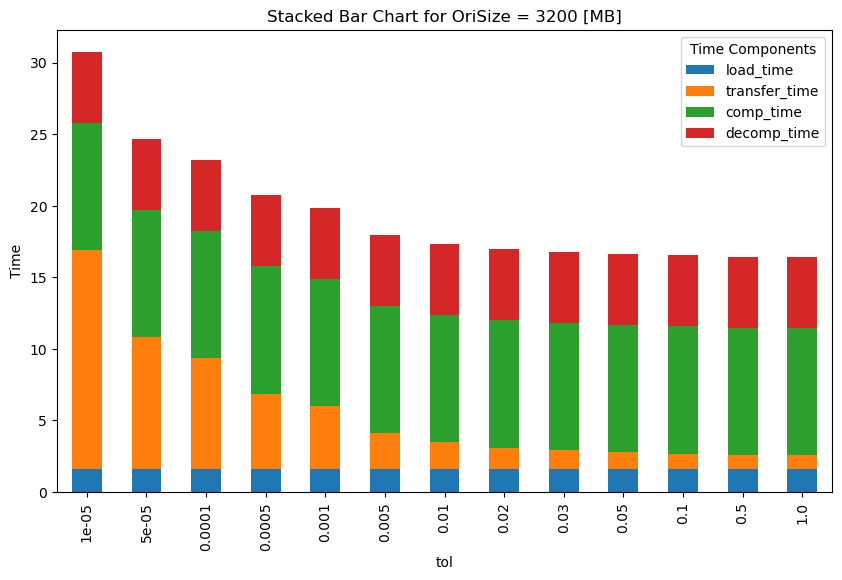

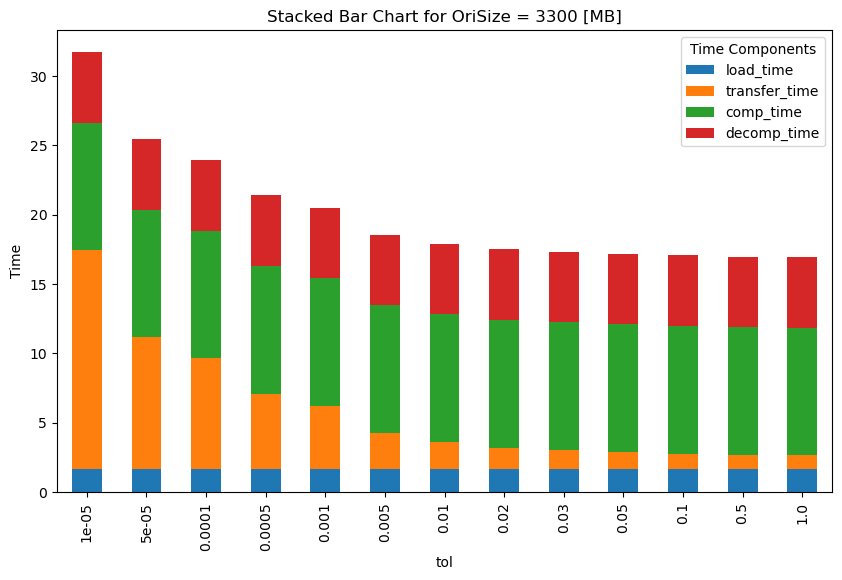

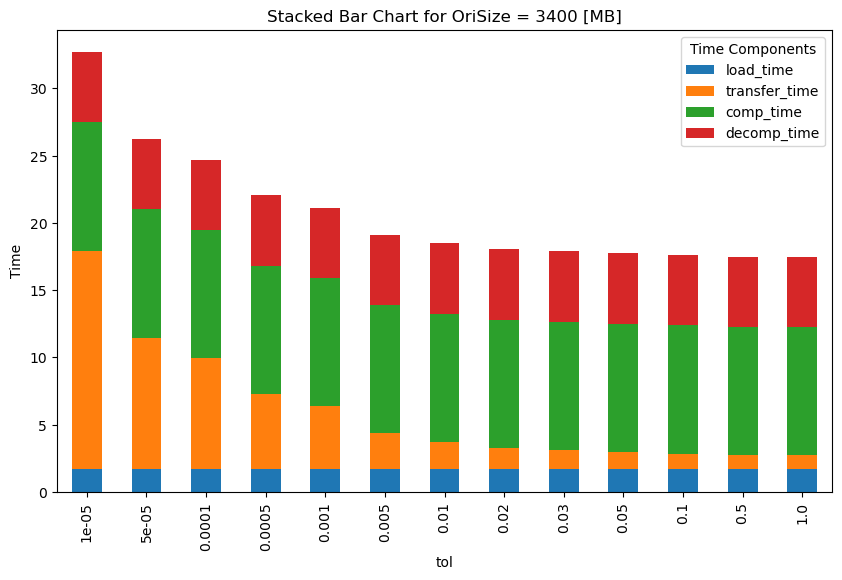

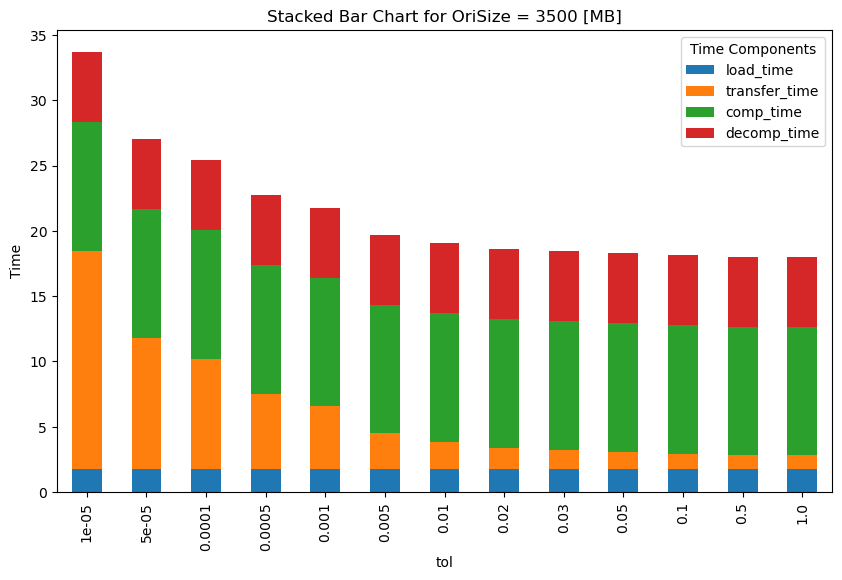

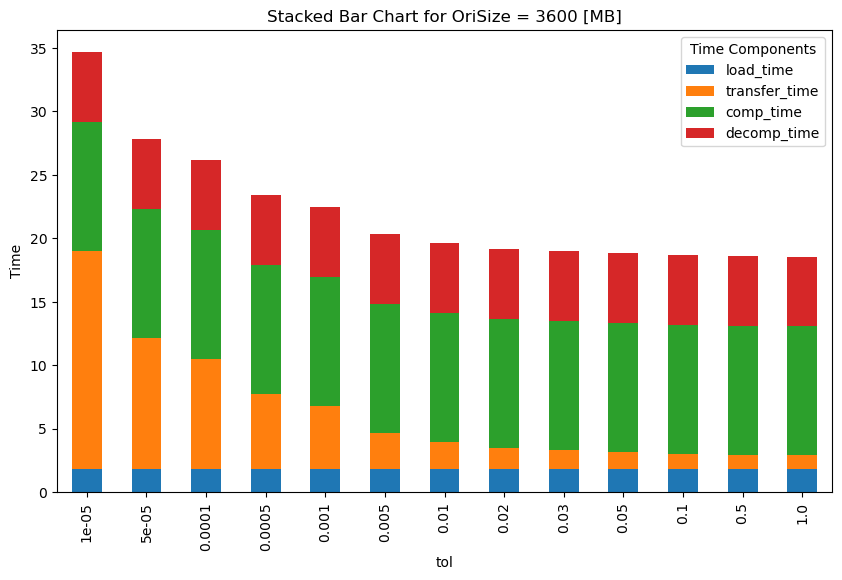

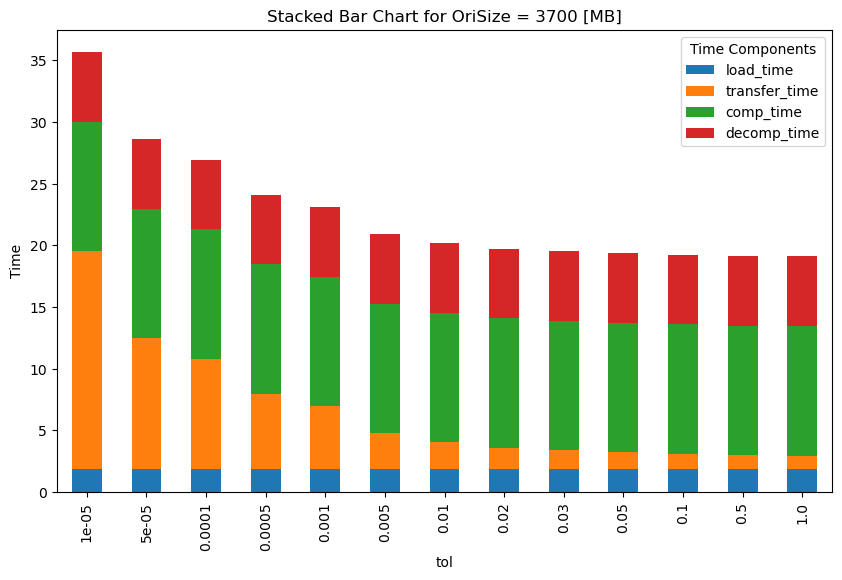

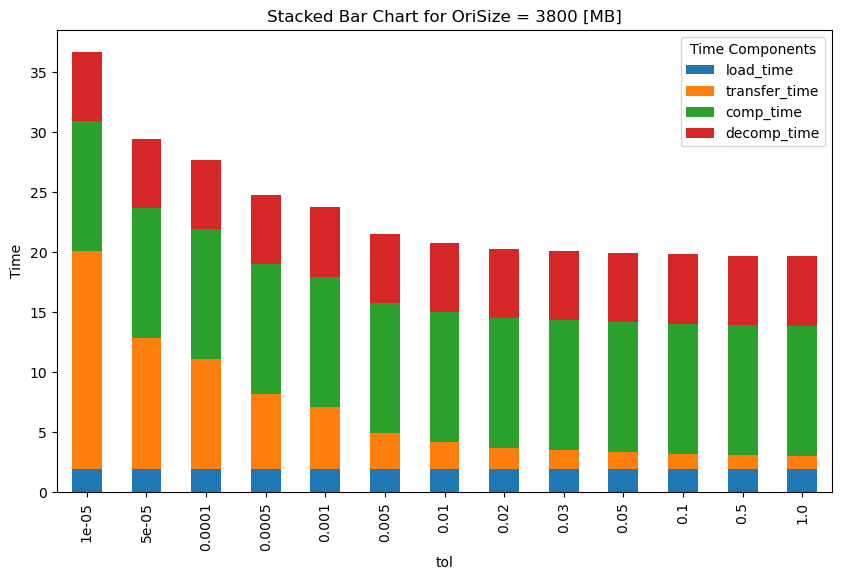

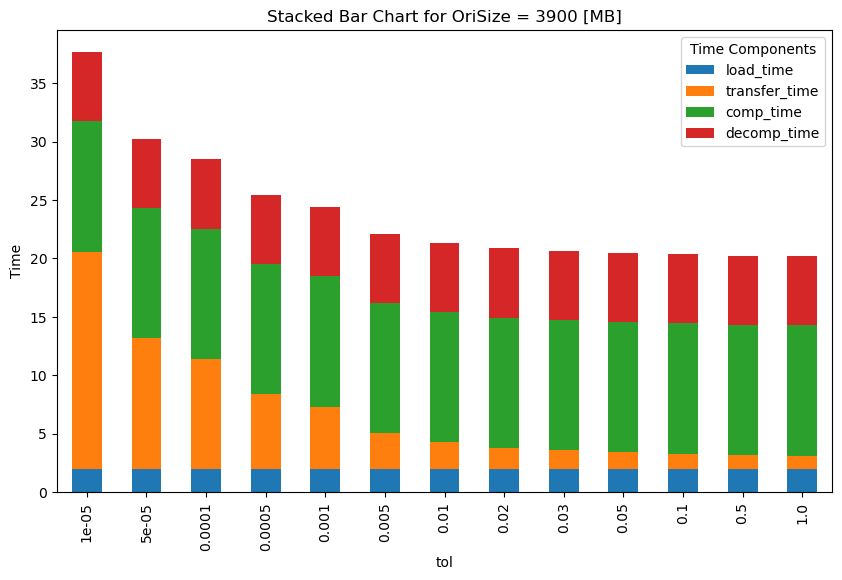

In [44]:

# Get unique values of 'OriSize'
unique_sizes = df['OriSize'].unique()

# Create a separate line graph for each 'OriSize'
for size in unique_sizes:
    size_df = df[df['OriSize'] == size]
    grouped = size_df.groupby('tol')[['load_time', 'transfer_time', 'comp_time', 'decomp_time']].sum()
    
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Stacked Bar Chart for OriSize = {size} [MB]')
    plt.xlabel('tol')
    plt.ylabel('Time')
    plt.legend(title='Time Components', loc='upper right')
    plt.show()

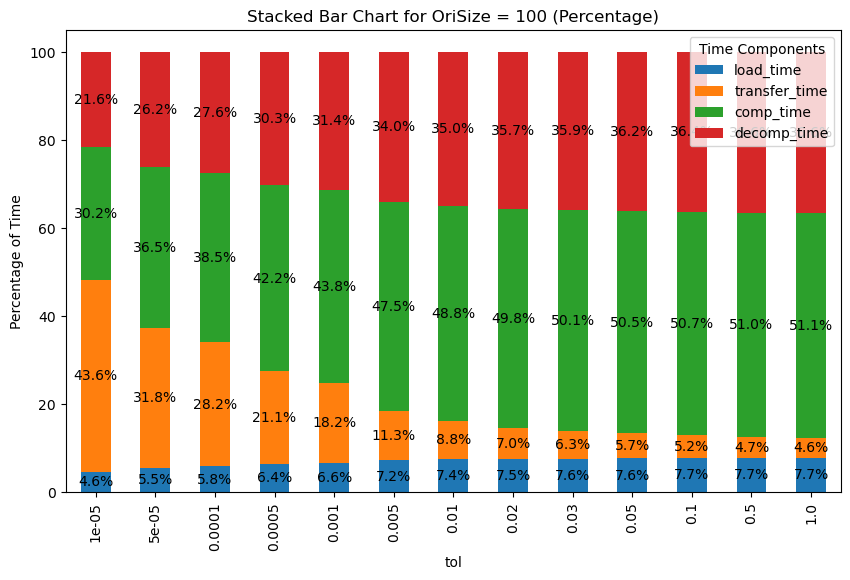

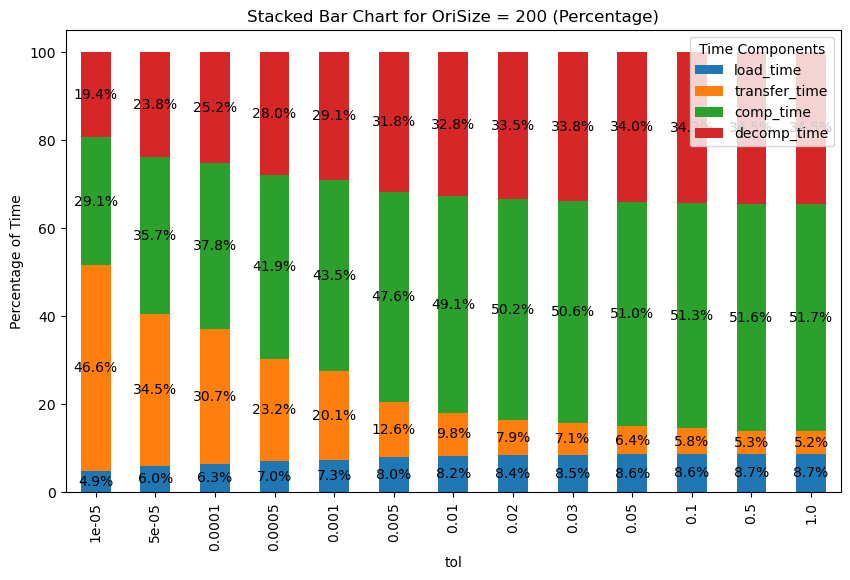

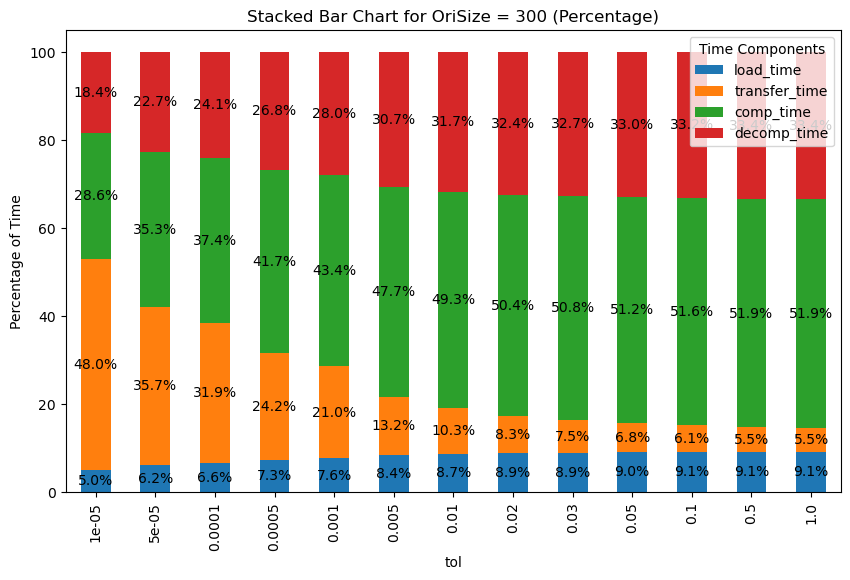

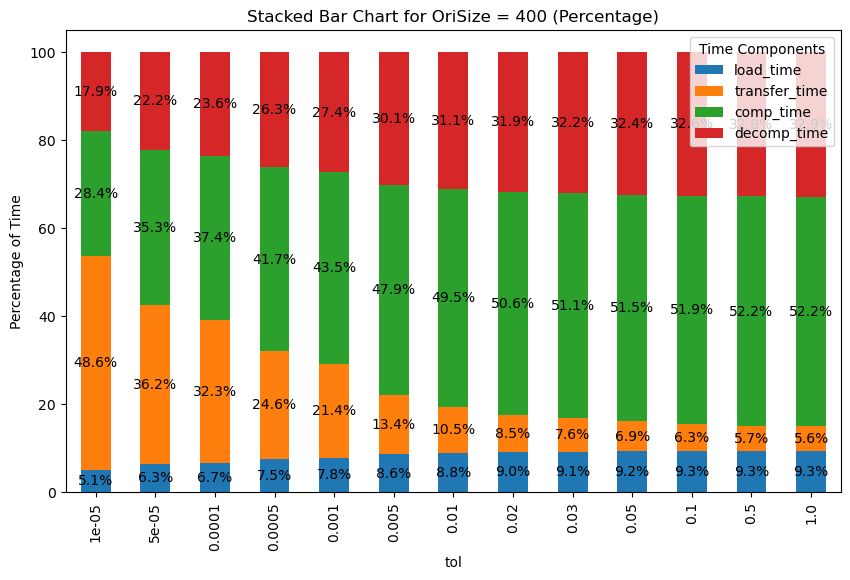

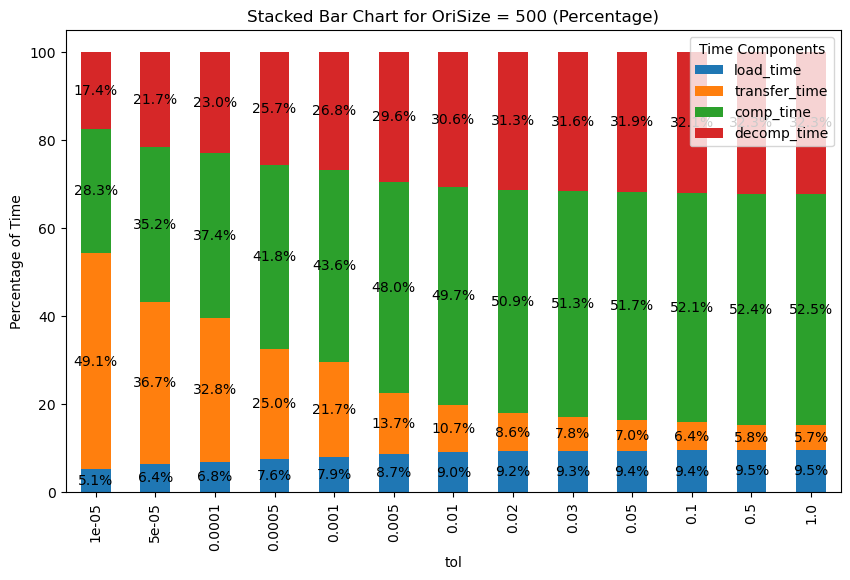

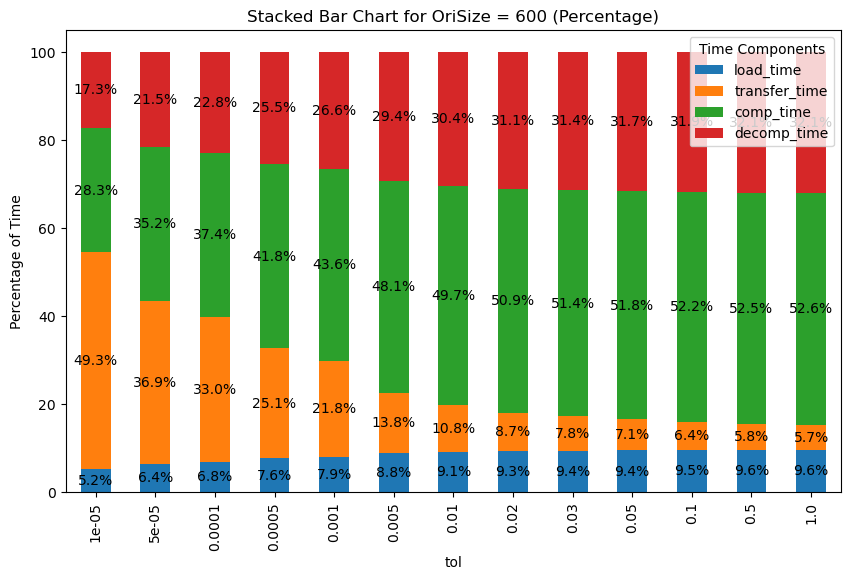

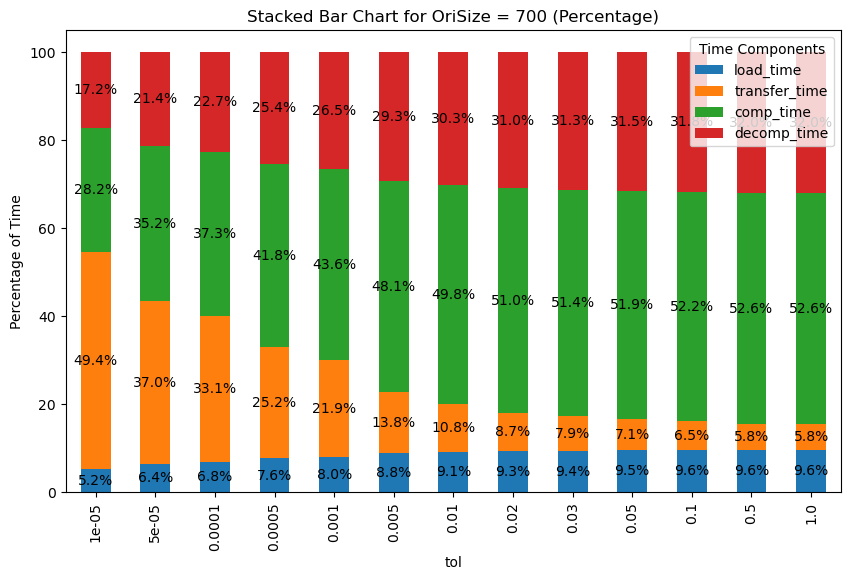

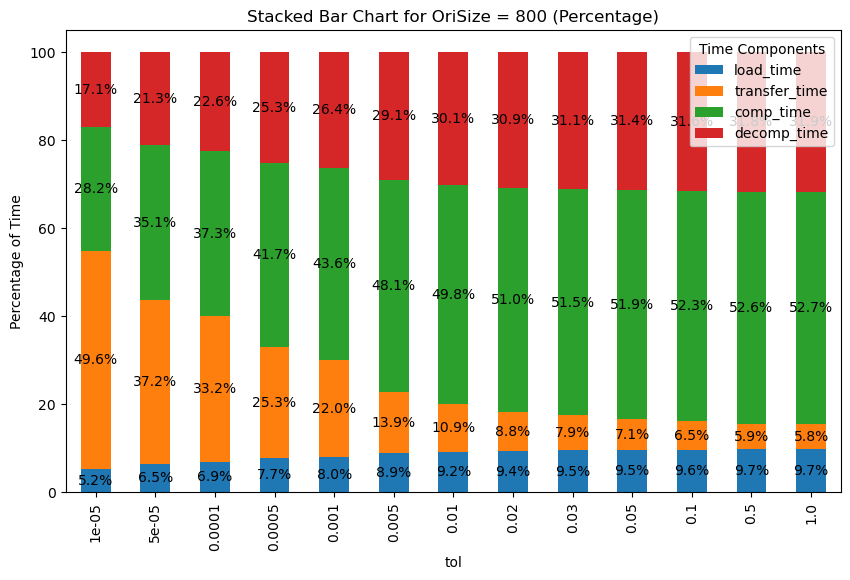

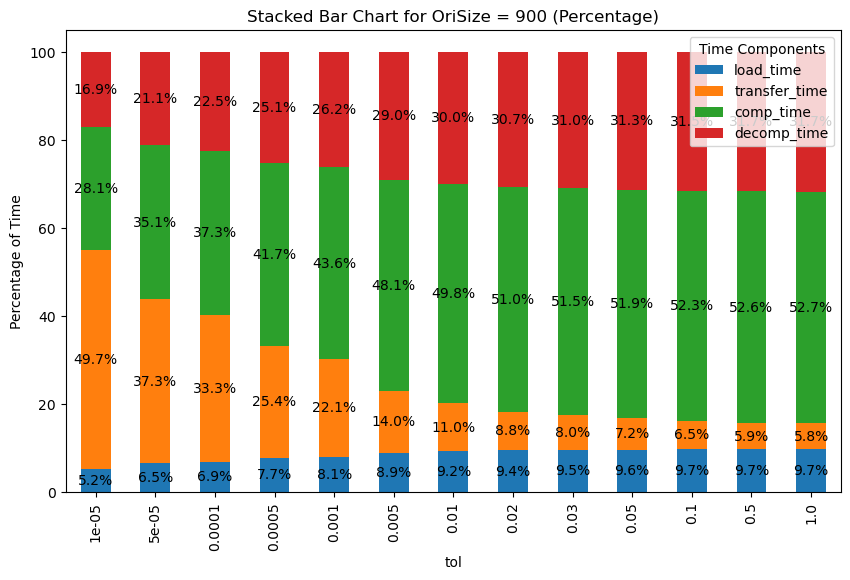

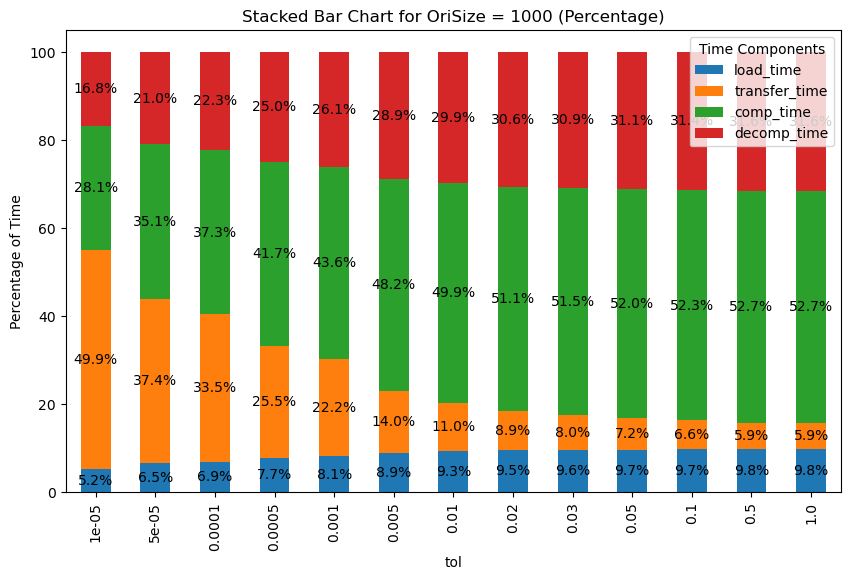

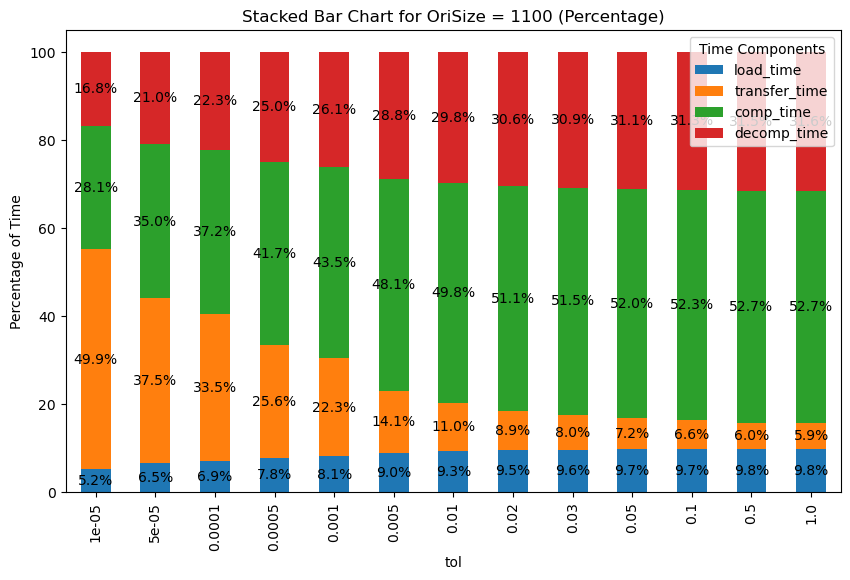

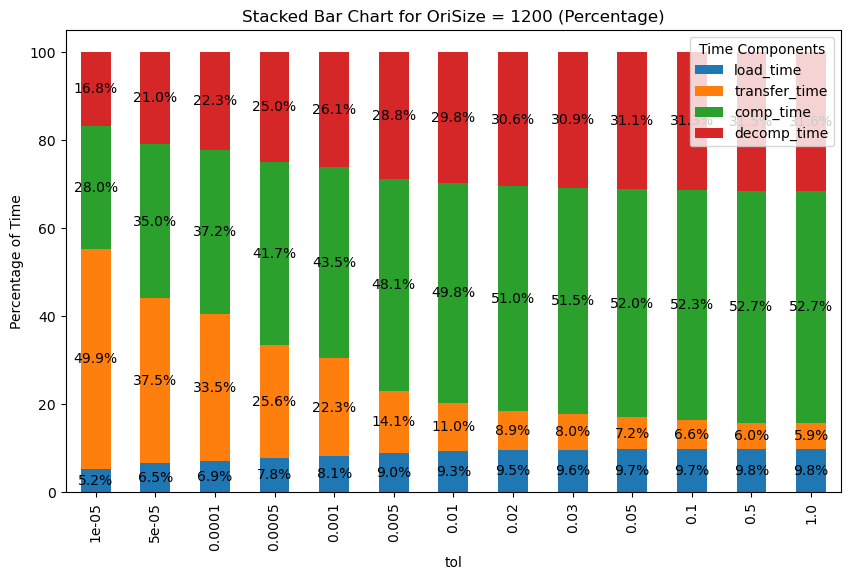

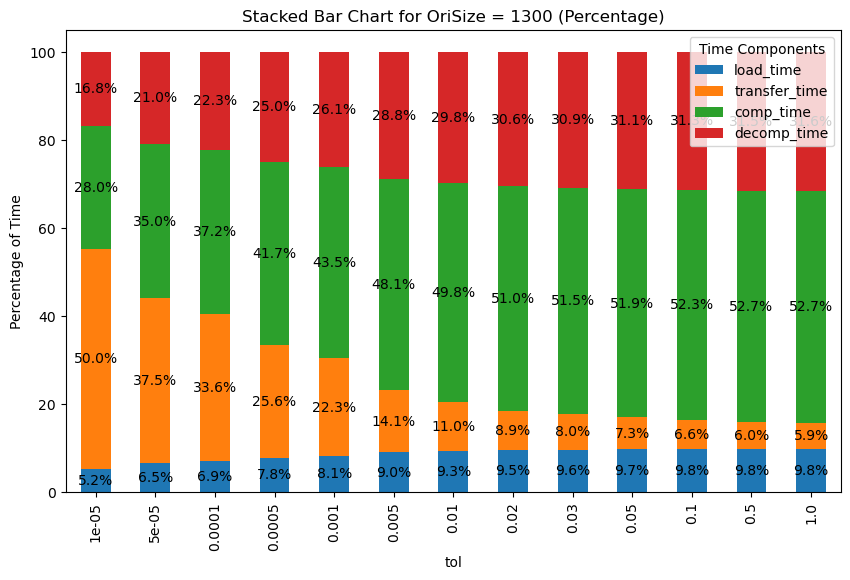

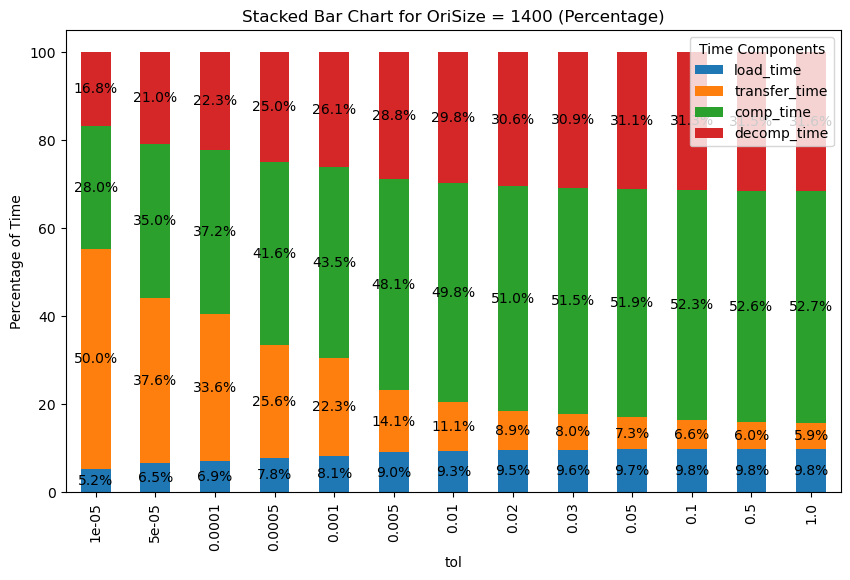

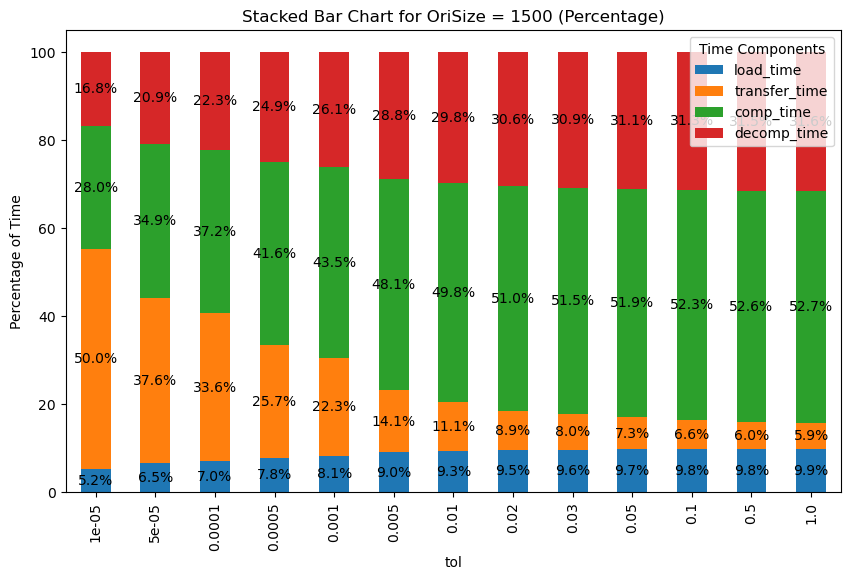

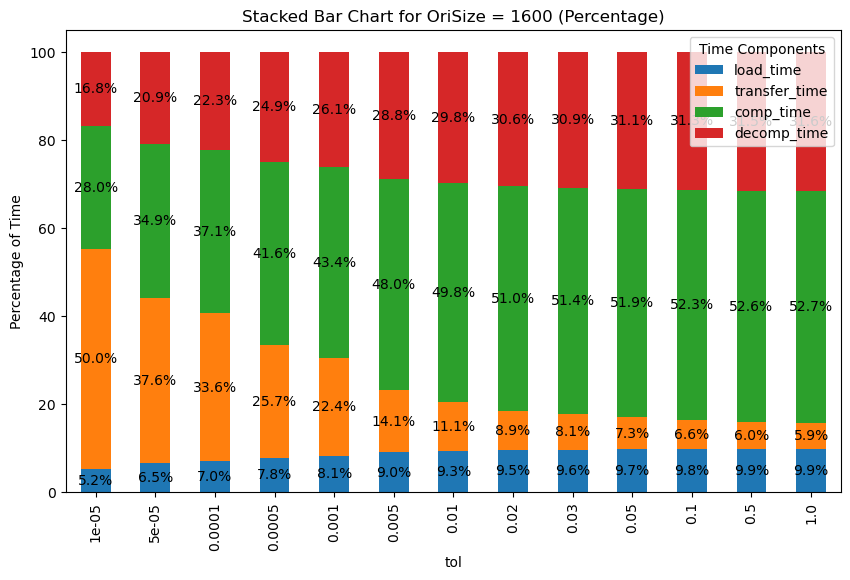

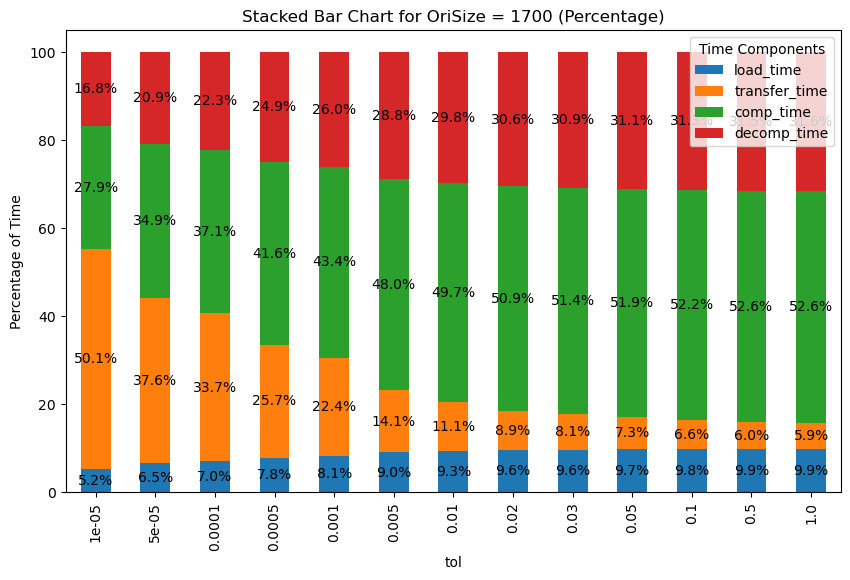

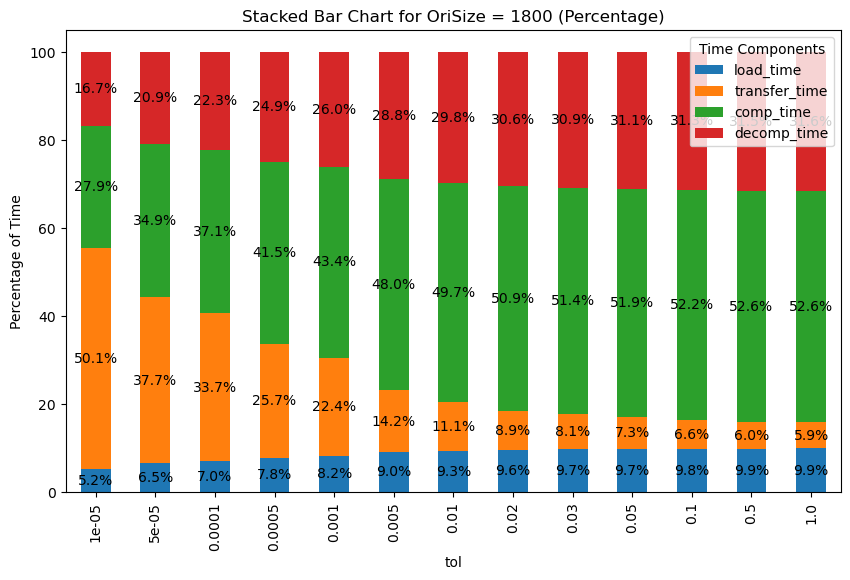

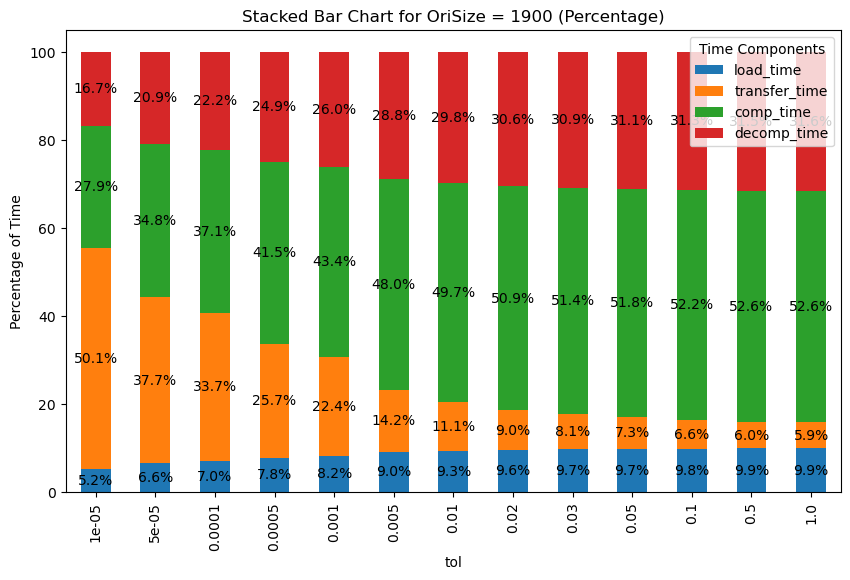

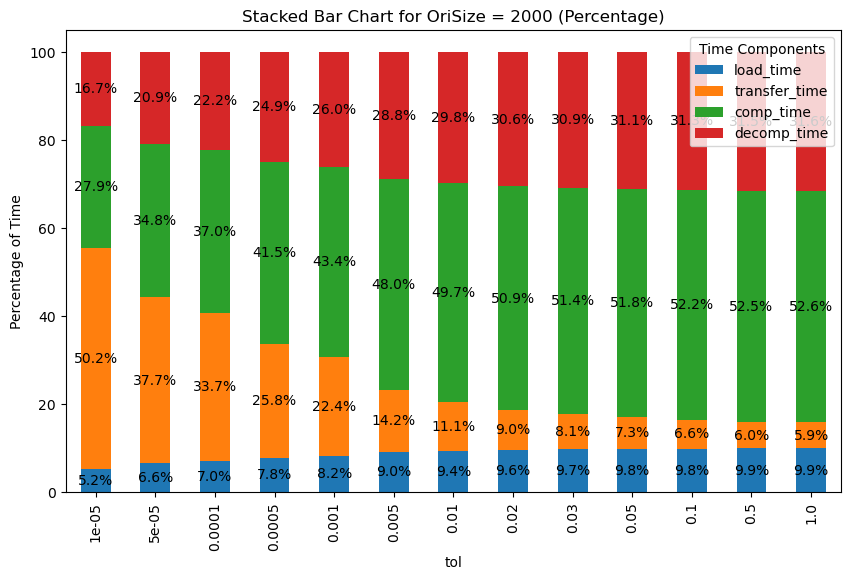

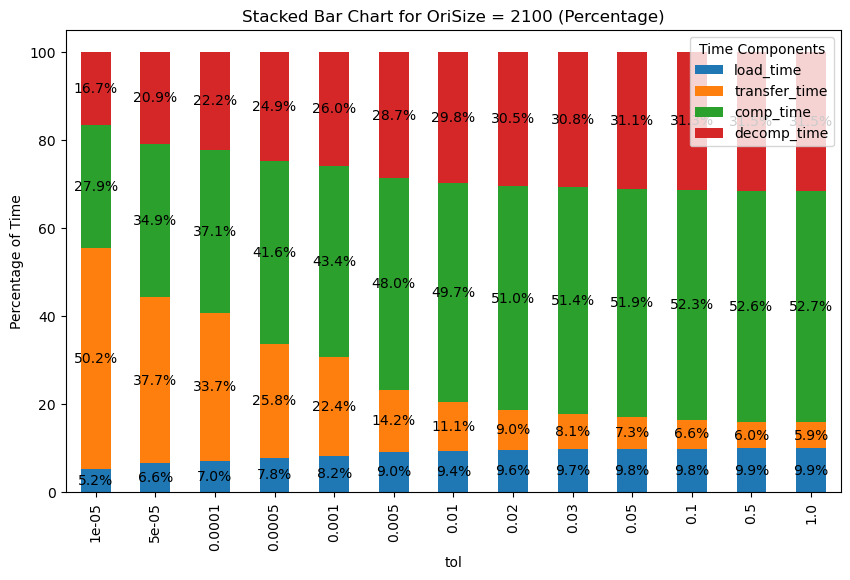

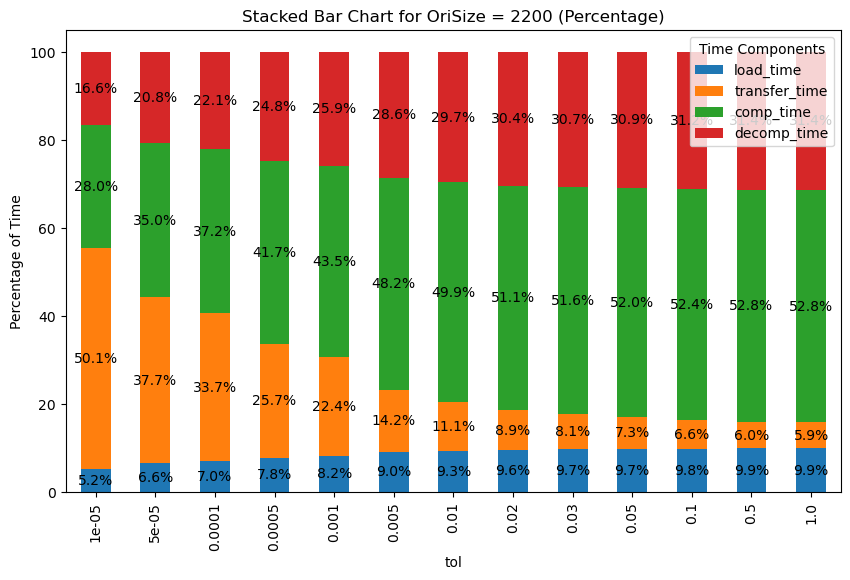

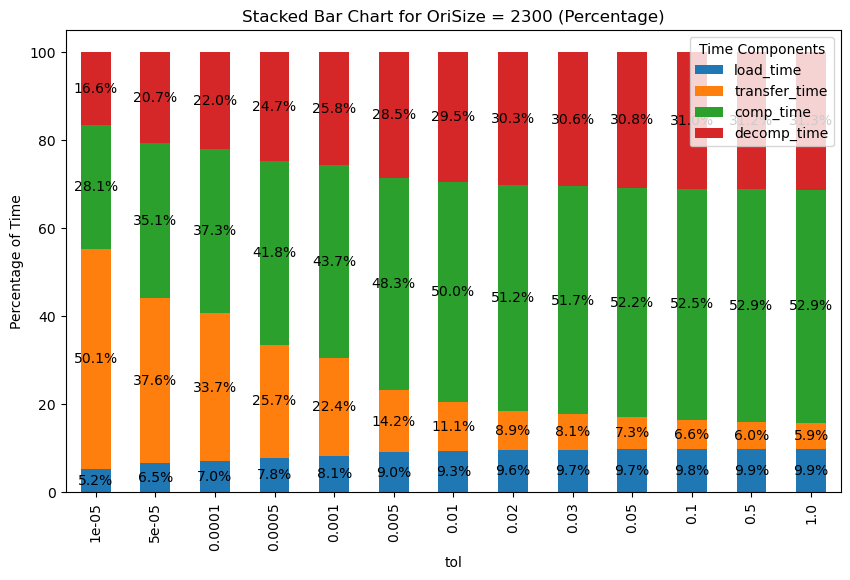

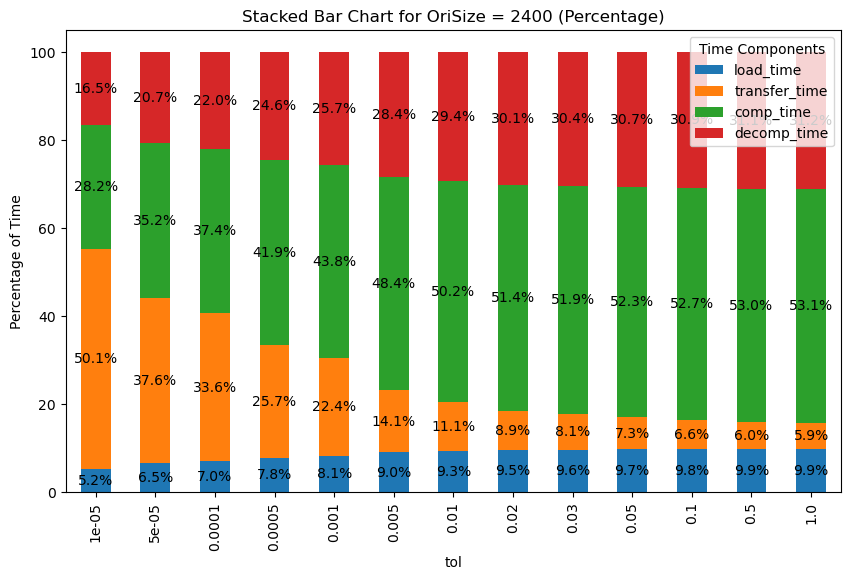

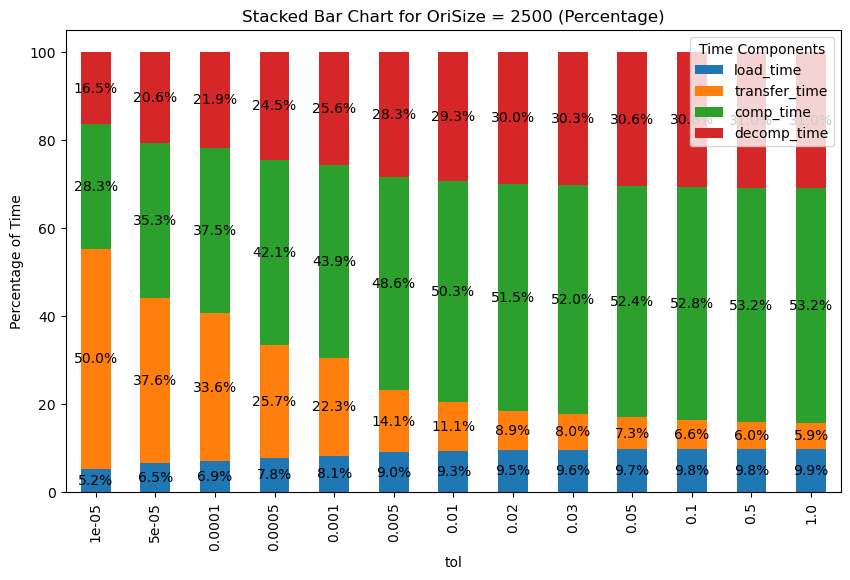

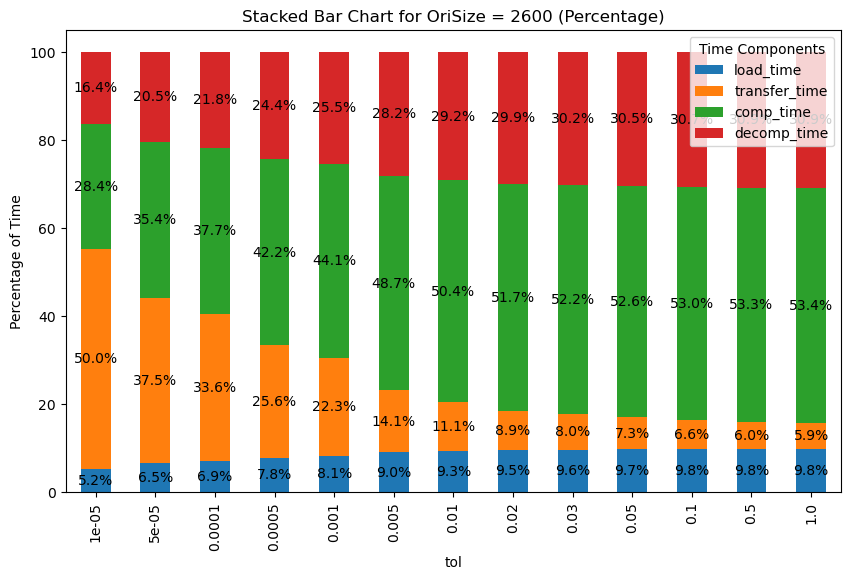

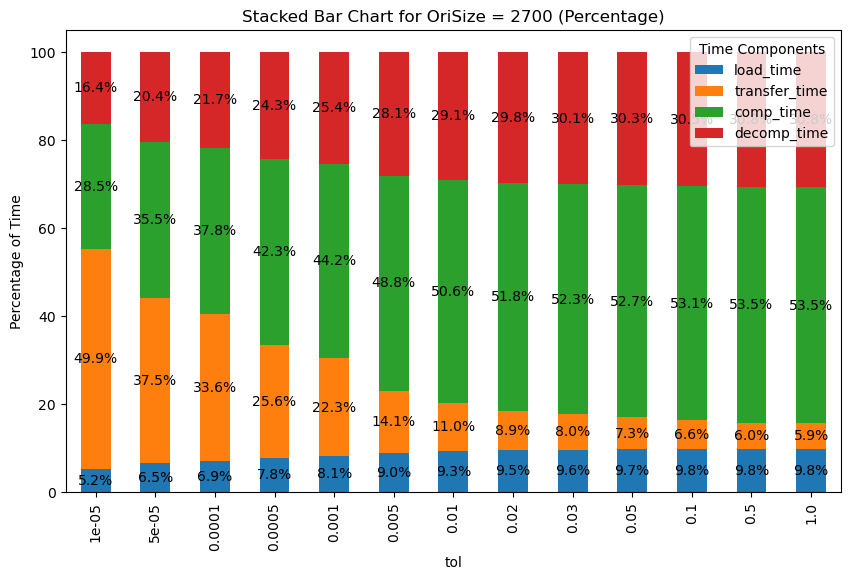

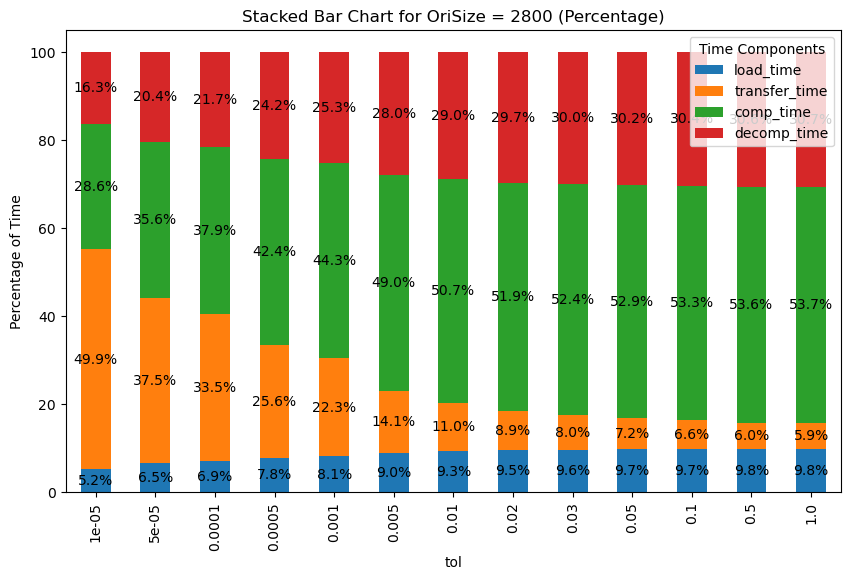

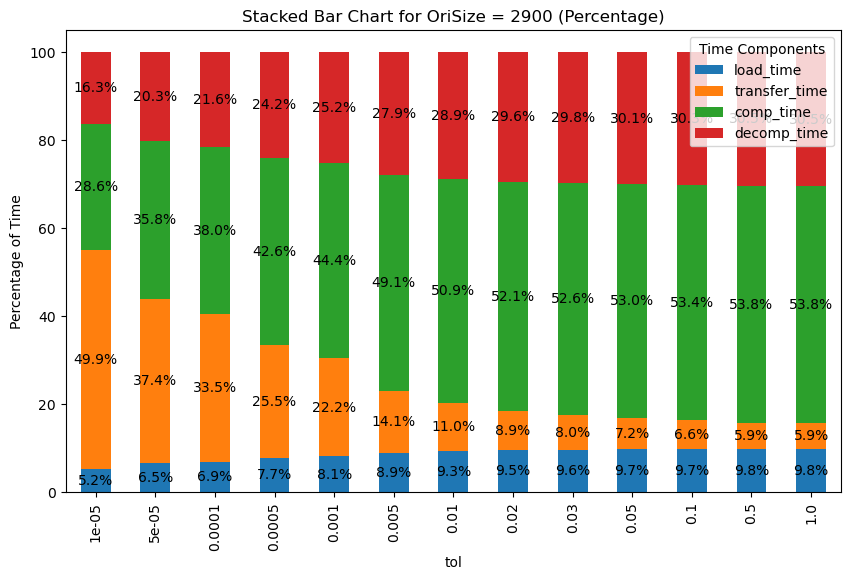

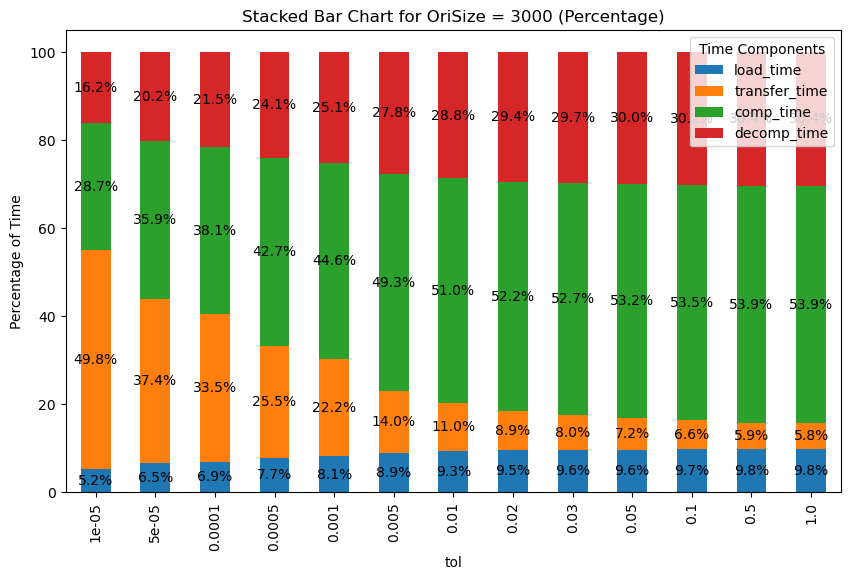

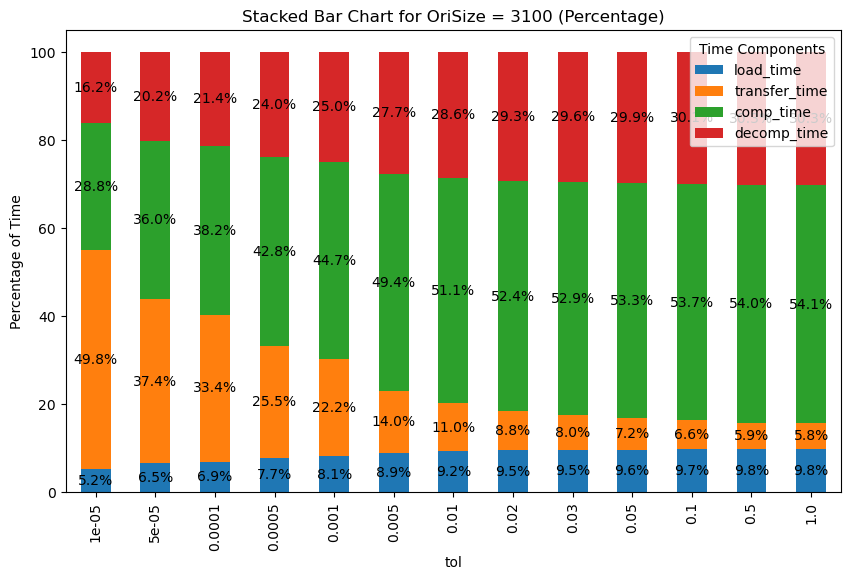

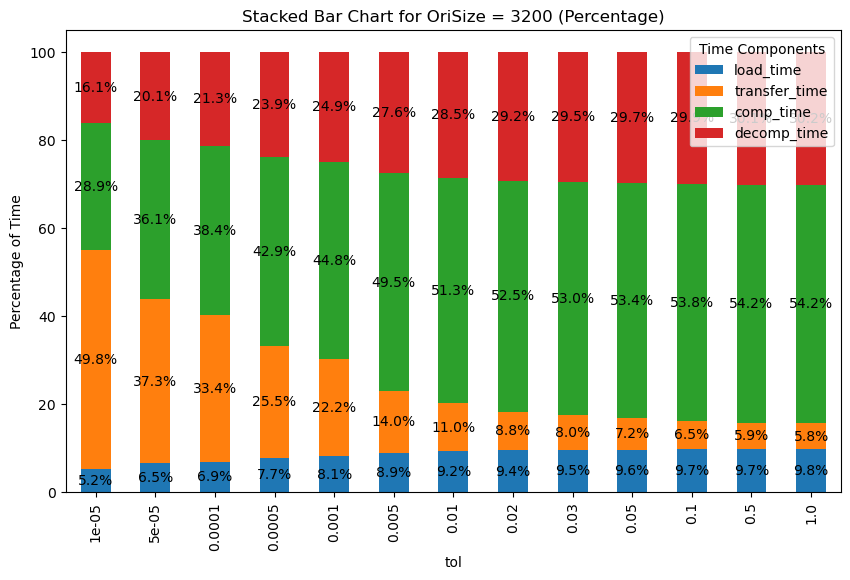

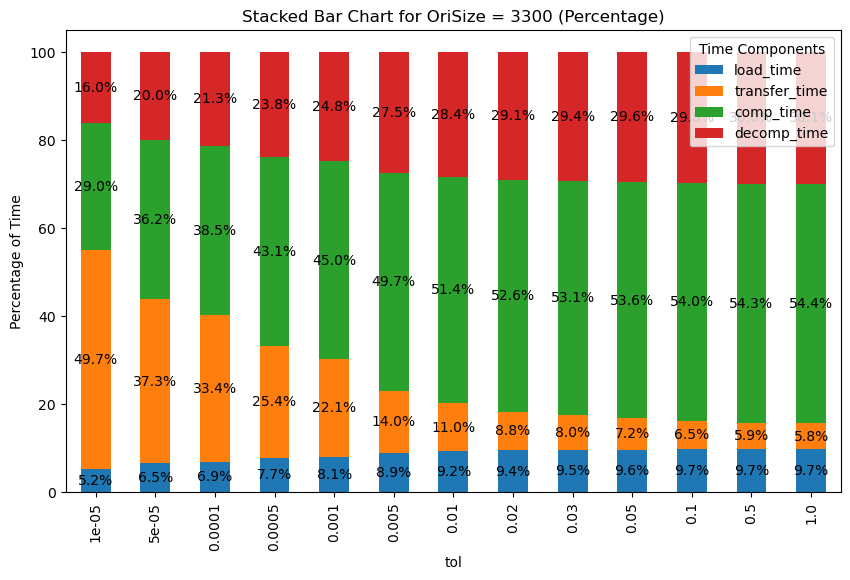

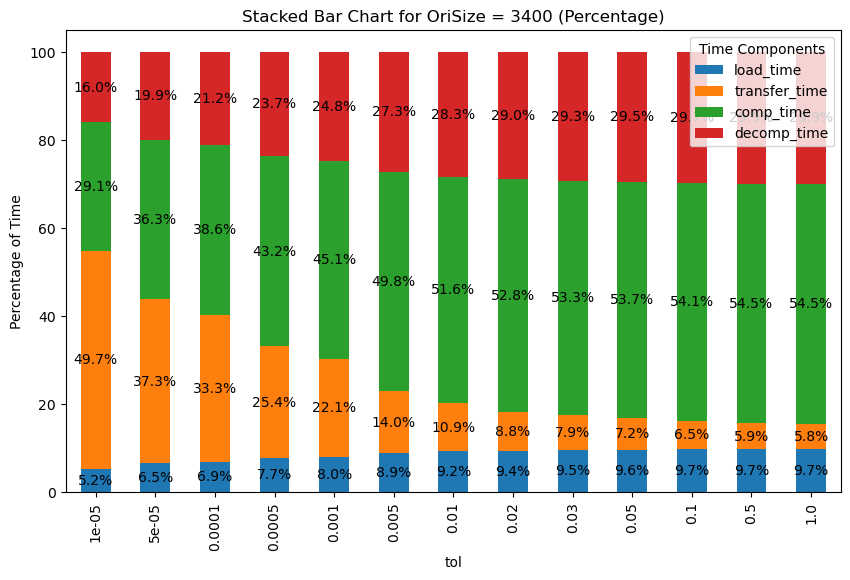

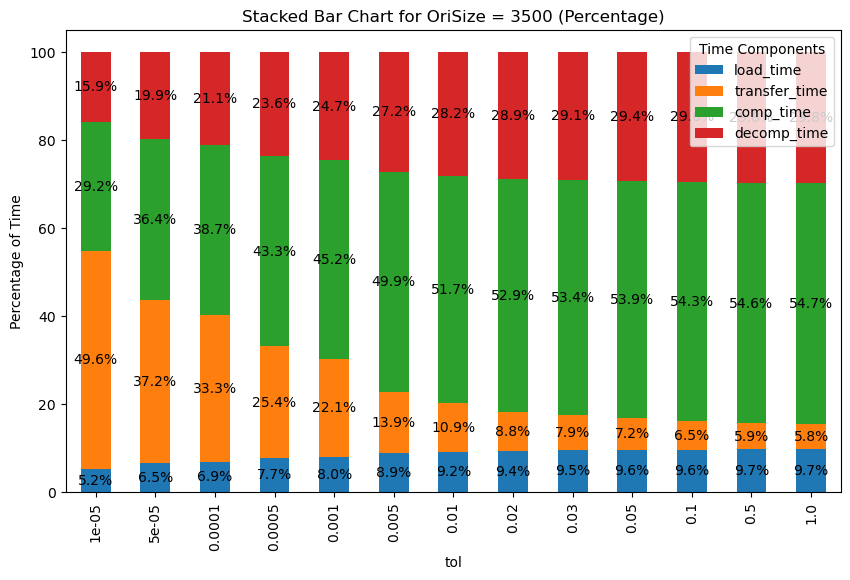

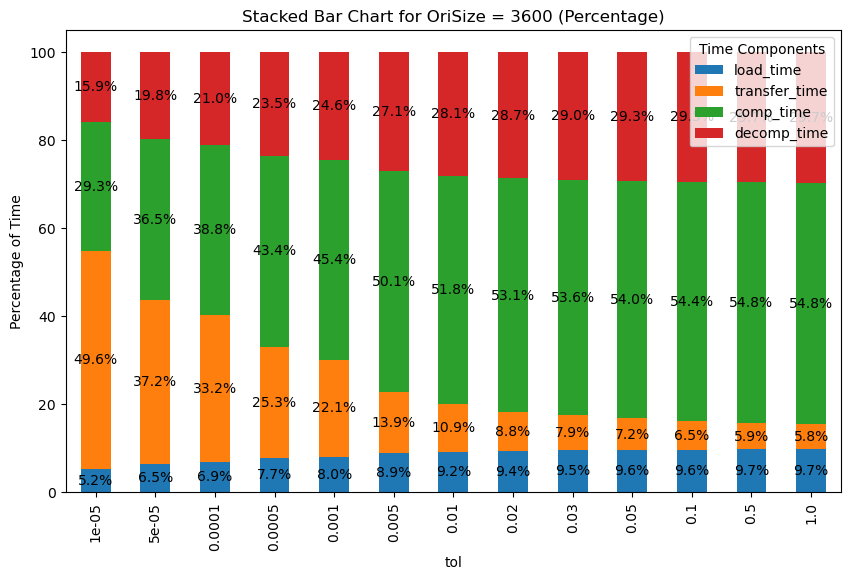

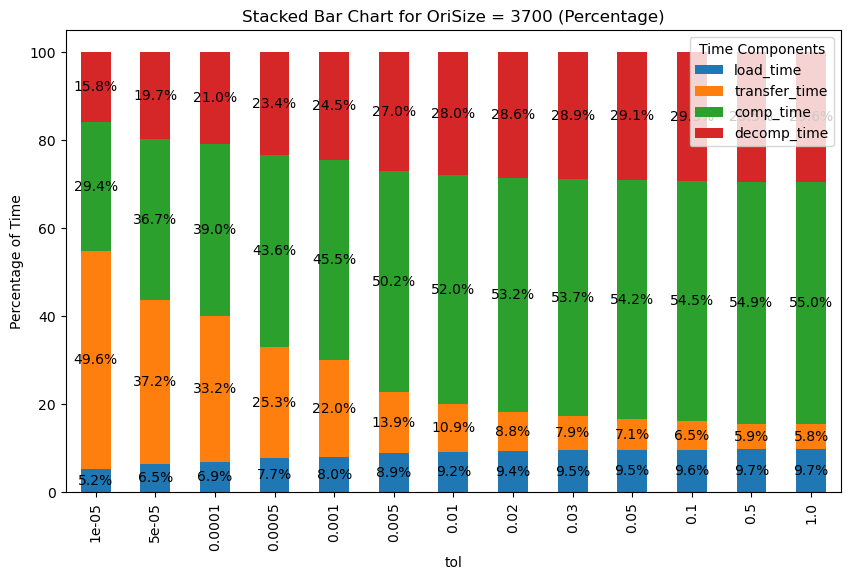

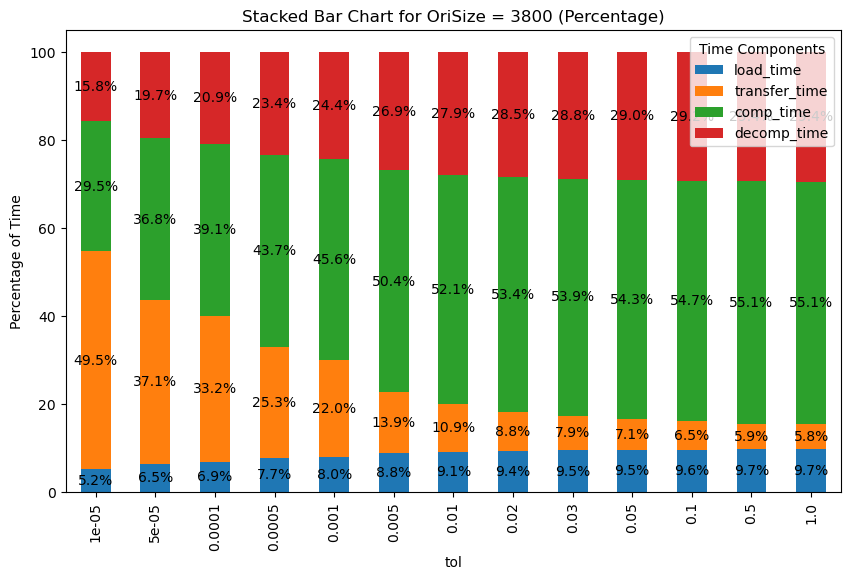

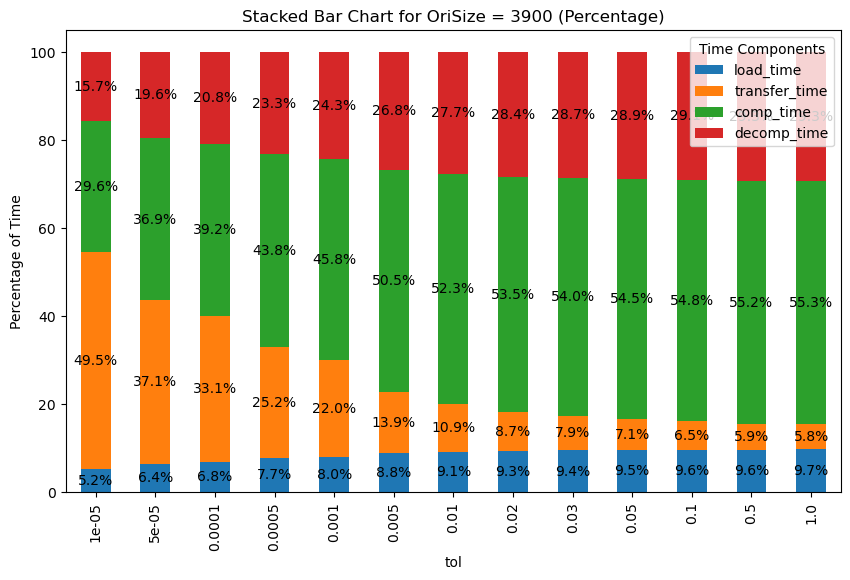

In [45]:

# Create a separate stacked bar chart for each 'OriSize' with percentage labels
for size in unique_sizes:
    size_df = df[df['OriSize'] == size]
    grouped = size_df.groupby('tol')[['load_time', 'transfer_time', 'comp_time', 'decomp_time']].sum()
    
    # Calculate the percentage values
    total_time = grouped.sum(axis=1)
    percentage_data = grouped.divide(total_time, axis=0) * 100
    
    ax = percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    # Add percentage labels to the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    
    plt.title(f'Stacked Bar Chart for OriSize = {size} (Percentage)')
    plt.xlabel('tol')
    plt.ylabel('Percentage of Time')
    plt.legend(title='Time Components', loc='upper right')
    plt.show()
    

In [26]:
df_single = pd.read_csv('./Latency_0921_single_reduced.csv')
df_mgard_single = df_single[df_single["device"] == "mgard_single"]
df_zlib_single = df_single[df_single["device"] =="zlib_single"]

In [30]:
df_zlib_single

tol  OriSize  total_latency  load_time  transfer_time   comp_time  \
0   0.0        0       0.000000       0.00       0.000000    0.000000   
1   0.0      100      10.726626       0.05       0.727273    8.929493   
2   0.0      200      21.364356       0.10       1.454545   17.723412   
3   0.0      300      32.117039       0.15       2.181818   26.644025   
4   0.0      400      43.239398       0.20       2.909091   35.968701   
5   0.0      500      54.584523       0.25       3.636364   45.529049   
6   0.0      600      65.483314       0.30       4.363636   54.560329   
7   0.0      700      76.272422       0.35       5.090909   63.446182   
8   0.0      800      87.029588       0.40       5.818182   72.274279   
9   0.0      900      97.756273       0.45       6.545455   81.045184   
10  0.0     1000     108.453969       0.50       7.272727   89.759450   
11  0.0     1100     118.983421       0.55       8.000000   98.425788   
12  0.0     1200     129.409907       0.60       8.727273  107.040742   
13  0.0     1300     139.774131       0.65       9.454545  115.602450   
14  0.0     1400     150.076703       0.70      10.181818  124.111404   
15  0.0     1500     160.318225       0.75      10.909091  132.568092   
16  0.0     1600     170.499290       0.80      11.636364  140.972991   
17  0.0     1700     180.620483       0.85      12.363636  149.326578   
18  0.0     1800     190.682384       0.90      13.090909  157.629320   
19  0.0     1900     200.685561       0.95      13.818182  165.881680   
20  0.0     2000     210.630578       1.00      14.545455  174.084116   
21  0.0     2100     220.852418       1.05      15.272727  182.523310   
22  0.0     2200     231.369200       1.10      16.000000  191.214896   
23  0.0     2300     241.885982       1.15      16.727273  199.906482   
24  0.0     2400     252.402764       1.20      17.454545  208.598068   
25  0.0     2500     262.919546       1.25      18.181818  217.289654   
26  0.0     2600     273.436328       1.30      18.909091  225.981240   
27  0.0     2700     283.953109       1.35      19.636364  234.672827   
28  0.0     2800     294.469891       1.40      20.363636  243.364413   
29  0.0     2900     304.986673       1.45      21.090909  252.055999   
30  0.0     3000     315.503455       1.50      21.818182  260.747585   
31  0.0     3100     326.020237       1.55      22.545455  269.439171   
32  0.0     3200     336.537018       1.60      23.272727  278.130757   
33  0.0     3300     347.053800       1.65      24.000000  286.822344   
34  0.0     3400     357.570582       1.70      24.727273  295.513930   
35  0.0     3500     368.087364       1.75      25.454545  304.205516   
36  0.0     3600     378.604146       1.80      26.181818  312.897102   
37  0.0     3700     389.120928       1.85      26.909091  321.588688   
38  0.0     3800     399.637709       1.90      27.636364  330.280274   
39  0.0     3900     410.154491       1.95      28.363636  338.971861   

    decomp_time       device  
0      0.000000  zlib_single  
1      1.019861  zlib_single  
2      2.086399  zlib_single  
3      3.141196  zlib_single  
4      4.161606  zlib_single  
5      5.169110  zlib_single  
6      6.259349  zlib_single  
7      7.385331  zlib_single  
8      8.537127  zlib_single  
9      9.715634  zlib_single  
10    10.921792  zlib_single  
11    12.007633  zlib_single  
12    13.041892  zlib_single  
13    14.067136  zlib_single  
14    15.083481  zlib_single  
15    16.091043  zlib_single  
16    17.089935  zlib_single  
17    18.080269  zlib_single  
18    19.062155  zlib_single  
19    20.035699  zlib_single  
20    21.001008  zlib_single  
21    22.006382  zlib_single  
22    23.054304  zlib_single  
23    24.102227  zlib_single  
24    25.150150  zlib_single  
25    26.198073  zlib_single  
26    27.245996  zlib_single  
27    28.293919  zlib_single  
28    29.341842  zlib_single  
29    30.389765  zlib_single  
30    31.437688  zlib_single  
31    32.485611  z

In [31]:
df_mgard_single

tol  OriSize  total_latency  load_time  transfer_time   comp_time  \
40   0.00001      100      19.015972       0.05       0.060639   10.706864   
41   0.00001      200      36.555896       0.10       0.121277   19.137120   
42   0.00001      300      52.482185       0.15       0.181916   26.794155   
43   0.00001      400      67.075476       0.20       0.242554   34.228803   
44   0.00001      500      80.508803       0.25       0.303193   41.065546   
..       ...      ...            ...        ...            ...         ...   
503  0.50000     3500     589.362002       1.75       1.096116  288.739256   
504  0.50000     3600     606.200917       1.80       1.127433  296.988949   
505  0.50000     3700     623.039831       1.85       1.158751  305.238642   
506  0.50000     3800     639.878746       1.90       1.190069  313.488335   
507  0.50000     3900     656.717660       1.95       1.221386  321.738028   

     decomp_time        device  
40      8.198469  mgard_single  
41     17.197500  mgard_single  
42     25.356115  mgard_single  
43     32.404119  mgard_single  
44     38.890065  mgard_single  
..           ...           ...  
503   297.776631  mgard_single  
504   306.284535  mgard_single  
505   314.792438  mgard_single  
506   323.300342  mgard_single  
507   331.808246  mgard_single  

[468 rows x 8 columns]

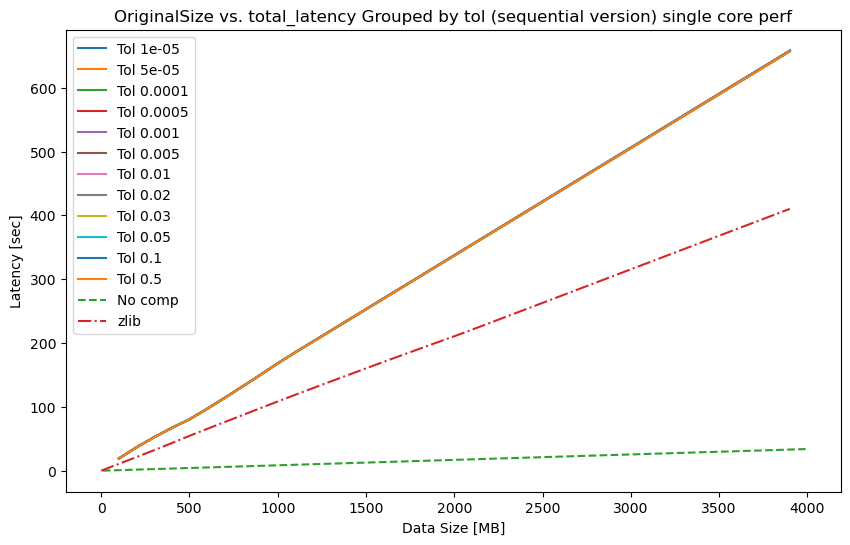

In [37]:
grouped_data = df_mgard_single.groupby('tol')

x_range = np.arange(10,4000,10)
No_comp_l = NoCompLatency(x_range)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each group and plot the data
for tol, group in grouped_data:
    ax.plot(group['OriSize'], group['total_latency'], label=f'Tol {tol}')

ax.plot(x_range,No_comp_l, label="No comp",linestyle='--')

ax.plot(df_zlib_single["OriSize"],df_zlib_single["total_latency"],linestyle="-.",label="zlib")

# Add labels and a legend
ax.set_xlabel('Data Size [MB]')
ax.set_ylabel('Latency [sec]')
ax.set_title('OriginalSize vs. total_latency Grouped by tol (sequential version) single core perf')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# detail of latency
